In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
dflist=pd.read_excel("EQUITY_L.csv.xlsx")

In [6]:
dflist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SYMBOL            2139 non-null   object        
 1   NAME OF COMPANY   2139 non-null   object        
 2    SERIES           2139 non-null   object        
 3    DATE OF LISTING  2139 non-null   datetime64[ns]
 4    PAID UP VALUE    2139 non-null   int64         
 5    MARKET LOT       2139 non-null   int64         
 6    ISIN NUMBER      2139 non-null   object        
 7    FACE VALUE       2139 non-null   int64         
 8   Yahoo_Ticker      2139 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 150.5+ KB


In [5]:
dflist.head()

,SYMBOL,NAME OF COMPANY,SERIES,DATE OF LISTING,PAID UP VALUE,MARKET LOT,ISIN NUMBER,FACE VALUE,Yahoo_Ticker
0,20MICRONS,20 Microns Limited,EQ,2008-10-06,5,1,INE144J01027,5,20MICRONS.NS
1,21STCENMGM,21st Century Management Services Limited,EQ,1995-05-03,10,1,INE253B01015,10,21STCENMGM.NS
2,360ONE,360 ONE WAM LIMITED,EQ,2019-09-19,1,1,INE466L01038,1,360ONE.NS
3,3IINFOLTD,3i Infotech Limited,EQ,2021-10-22,10,1,INE748C01038,10,3IINFOLTD.NS
4,3MINDIA,3M India Limited,EQ,2004-08-13,10,1,INE470A01017,10,3MINDIA.NS


In [ ]:
dflist["Yahoo_Ticker"] = dflist["Symbol"].astype(str) + ".NS"
midcap_tickers = dflist["Yahoo_Ticker"].tolist()

all_data = []

In [13]:
for ticker in midcap_tickers:
    stock = yf.Ticker(ticker)

    # Try fetching fast_info safely
    try:
        fast_info = stock.fast_info
    except:
        fast_info = {}

    # Financials
    try:
        financials = stock.financials
    except:
        financials = pd.DataFrame()

    # Balance Sheet
    try:
        balance_sheet = stock.balance_sheet
    except:
        balance_sheet = pd.DataFrame()

    # Cashflow
    try:
        cashflow = stock.cashflow
    except:
        cashflow = pd.DataFrame()

    # Handle possible multiple equity/liability keys
    shareholder_equity_keys = [
        "Stockholders Equity", 
        "Common Stock Equity", 
        "Total Equity Gross Minority Interest"
    ]
    current_liabilities_keys = [
        "Current Liabilities", 
        "Other Current Liabilities"
    ]

    shareholder_equity = next(
        (balance_sheet.loc[k].iloc[0] for k in shareholder_equity_keys if k in balance_sheet.index),
        None
    )
    current_liabilities = next(
        (balance_sheet.loc[k].iloc[0] for k in current_liabilities_keys if k in balance_sheet.index),
        None
    )

    # Company Info
    try:
        info = stock.get_info()
    except:
        info = {}

    # Price (SAFE handling)
    price = None
    try:
        price = fast_info.get("lastPrice") or fast_info.get("last_price")
    except Exception as e:
        print(f"{ticker}: no price data ({e})")
        price = None

    # Append to list
    all_data.append({
        "Ticker": ticker,
        "Price": price,   # ✅ safe variable
        "EPS": info.get("trailingEps"),
        "Book Value": info.get("bookValue"),
        "Dividend per Share": info.get("dividendRate"),
        "Net Income": financials.loc["Net Income"].iloc[0] if "Net Income" in financials.index else None,
        "Shareholder Equity": shareholder_equity,
        "Current Liabilities": current_liabilities,
        "EBIT": financials.loc["EBIT"].iloc[0] if "EBIT" in financials.index else None,
        "Total Assets": balance_sheet.loc["Total Assets"].iloc[0] if "Total Assets" in balance_sheet.index else None,
        "Total Liabilities": balance_sheet.loc["Total Liabilities Net Minority Interest"].iloc[0] 
                            if "Total Liabilities Net Minority Interest" in balance_sheet.index else None,
        "Revenue": financials.loc["Total Revenue"].iloc[0] if "Total Revenue" in financials.index else None,
        "Operating Income": financials.loc["Operating Income"].iloc[0] if "Operating Income" in financials.index else None,
        "Free Cash Flow": cashflow.loc["Free Cash Flow"].iloc[0] if "Free Cash Flow" in cashflow.index else None
    })


HTTP Error 404: 
$EFCIL.NS: possibly delisted; no price data found  (period=1y) (Yahoo error = "No data found, symbol may be delisted")
$EFCIL.NS: possibly delisted; no price data found  (period=5d) (Yahoo error = "No data found, symbol may be delisted")


EFCIL.NS: no price data ('currentTradingPeriod')


$KALYANI.NS: possibly delisted; no price data found  (period=5d)


In [16]:
df = pd.DataFrame(all_data)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2675 non-null   object 
 1   Price                2674 non-null   float64
 2   EPS                  2648 non-null   float64
 3   Book Value           2649 non-null   float64
 4   Dividend per Share   1507 non-null   float64
 5   Net Income           2655 non-null   float64
 6   Shareholder Equity   2655 non-null   float64
 7   Current Liabilities  2554 non-null   float64
 8   EBIT                 2568 non-null   float64
 9   Total Assets         2655 non-null   float64
 10  Total Liabilities    2655 non-null   float64
 11  Revenue              2655 non-null   float64
 12  Operating Income     2557 non-null   float64
 13  Free Cash Flow       2655 non-null   float64
dtypes: float64(13), object(1)
memory usage: 292.7+ KB


In [18]:
missing_price = df[df["Price"].isna()]
print(missing_price[["Ticker"]])


        Ticker
1072  EFCIL.NS


In [19]:
missing_counts = df.isna().sum()

print(missing_counts)

Ticker                    0
Price                     1
EPS                      27
Book Value               26
Dividend per Share     1168
Net Income               20
Shareholder Equity       20
Current Liabilities     121
EBIT                    107
Total Assets             20
Total Liabilities        20
Revenue                  20
Operating Income        118
Free Cash Flow           20
dtype: int64


In [21]:
df.isnull().sum()

Ticker                    0
Price                     1
EPS                      27
Book Value               26
Dividend per Share     1168
Net Income               20
Shareholder Equity       20
Current Liabilities     121
EBIT                    107
Total Assets             20
Total Liabilities        20
Revenue                  20
Operating Income        118
Free Cash Flow           20
dtype: int64

In [27]:
df['Price'].nunique()

2091

In [28]:
df['Price'].notna().sum()


np.int64(2674)

In [29]:
df[df.duplicated(subset=['Price'], keep=False)].sort_values('Price')


,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
446,DAVAN-RE1.NS,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
982,DAVAN-RE1.NS,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1020,DHARAN.NS,0.42,-0.06,2.529,NaN,-3.833750e+08,8.814839e+09,5.998780e+08,-3.472120e+08,1.058699e+10,1.772147e+09,1.799240e+08,-3.972030e+08,1.667950e+08
484,DHARAN.NS,0.42,-0.06,2.529,NaN,-3.833750e+08,8.814839e+09,5.998780e+08,-3.472120e+08,1.058699e+10,1.772147e+09,1.799240e+08,-3.972030e+08,1.667950e+08
622,AKSHAR.NS,0.51,-0.12,1.120,NaN,-4.448100e+07,8.821160e+08,5.830000e+07,-4.788100e+07,9.811310e+08,9.901500e+07,1.167691e+09,-4.875400e+07,-3.208110e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3MINDIA.NS,31160.00,440.87,1639.135,160.0,4.760674e+09,1.846497e+10,1.042956e+10,7.842089e+09,3.014592e+10,1.168095e+10,4.442860e+10,7.262615e+09,2.996842e+09
24,ABBOTINDIA.NS,33065.00,684.39,1992.136,475.0,1.414440e+10,4.233150e+10,1.407190e+10,1.898380e+10,5.917310e+10,1.684160e+10,6.406970e+10,1.644650e+10,9.592400e+09
560,ABBOTINDIA.NS,33065.00,684.39,1992.136,475.0,1.414440e+10,4.233150e+10,1.407190e+10,1.898380e+10,5.917310e+10,1.684160e+10,6.406970e+10,1.644650e+10,9.592400e+09
320,BOSCHLTD.NS,39860.00,904.71,4683.484,512.0,2.015200e+10,1.381330e+11,6.199400e+10,2.741600e+10,2.024110e+11,6.427800e+10,1.768200e+11,1.830600e+10,2.058000e+10


In [30]:
# Find completely duplicated rows
duplicates = df[df.duplicated(keep=False)]

# Count them
print("Total duplicate rows:", df.duplicated().sum())

# Show some examples
duplicates.sort_values("Ticker").head(20)


Total duplicate rows: 536


,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
0,20MICRONS.NS,240.800003,17.40,121.679,1.25,6.237630e+08,4.293638e+09,2.193068e+09,9.402180e+08,7.145086e+09,2.804542e+09,9.116589e+09,1.006005e+09,-4.489380e+08
536,20MICRONS.NS,240.800003,17.40,121.679,1.25,6.237630e+08,4.293638e+09,2.193068e+09,9.402180e+08,7.145086e+09,2.804542e+09,9.116589e+09,1.006005e+09,-4.489380e+08
537,21STCENMGM.NS,56.950001,-9.33,48.584,2.50,1.233770e+08,5.101340e+08,5.858100e+07,1.951270e+08,5.706500e+08,6.051600e+07,1.128817e+09,1.944280e+08,5.147800e+07
1,21STCENMGM.NS,56.950001,-9.33,48.584,2.50,1.233770e+08,5.101340e+08,5.858100e+07,1.951270e+08,5.706500e+08,6.051600e+07,1.128817e+09,1.944280e+08,5.147800e+07
2,360ONE.NS,1078.900024,26.56,180.591,12.00,1.015300e+10,7.065120e+10,6.828100e+09,2.233840e+10,1.976870e+11,1.270358e+11,2.635310e+10,1.283430e+10,-2.466110e+10
538,360ONE.NS,1078.900024,26.56,180.591,12.00,1.015300e+10,7.065120e+10,6.828100e+09,2.233840e+10,1.976870e+11,1.270358e+11,2.635310e+10,1.283430e+10,-2.466110e+10
3,3IINFOLTD.NS,22.360001,2.45,18.139,NaN,2.535000e+08,3.068800e+09,2.219800e+09,1.920000e+08,5.728200e+09,2.659300e+09,7.257600e+09,-6.840000e+07,3.974000e+08
539,3IINFOLTD.NS,22.360001,2.45,18.139,NaN,2.535000e+08,3.068800e+09,2.219800e+09,1.920000e+08,5.728200e+09,2.659300e+09,7.257600e+09,-6.840000e+07,3.974000e+08
4,3MINDIA.NS,31160.000000,440.87,1639.135,160.00,4.760674e+09,1.846497e+10,1.042956e+10,7.842089e+09,3.014592e+10,1.168095e+10,4.442860e+10,7.262615e+09,2.996842e+09
540,3MINDIA.NS,31160.000000,440.87,1639.135,160.00,4.760674e+09,1.846497e+10,1.042956e+10,7.842089e+09,3.014592e+10,1.168095e+10,4.442860e+10,7.262615e+09,2.996842e+09


In [33]:
df.duplicated().sum()

np.int64(536)

In [34]:
df_clean=df.drop_duplicates()

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2139 entries, 0 to 2674
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2139 non-null   object 
 1   Price                2138 non-null   float64
 2   EPS                  2122 non-null   float64
 3   Book Value           2120 non-null   float64
 4   Dividend per Share   1203 non-null   float64
 5   Net Income           2125 non-null   float64
 6   Shareholder Equity   2125 non-null   float64
 7   Current Liabilities  2044 non-null   float64
 8   EBIT                 2056 non-null   float64
 9   Total Assets         2125 non-null   float64
 10  Total Liabilities    2125 non-null   float64
 11  Revenue              2125 non-null   float64
 12  Operating Income     2047 non-null   float64
 13  Free Cash Flow       2125 non-null   float64
dtypes: float64(13), object(1)
memory usage: 250.7+ KB


In [37]:
df_clean.duplicated().sum()

np.int64(0)

In [42]:
df_clean.isnull().sum()

Ticker                   0
Price                    1
EPS                     17
Book Value              19
Dividend per Share     936
Net Income              14
Shareholder Equity      14
Current Liabilities     95
EBIT                    83
Total Assets            14
Total Liabilities       14
Revenue                 14
Operating Income        92
Free Cash Flow          14
dtype: int64

In [46]:
df_clean.to_csv("C:/Users/tinup/machine Learning/Market_data.csv", index=False)


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_csv('Market_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2139 non-null   object 
 1   Price                2138 non-null   float64
 2   EPS                  2122 non-null   float64
 3   Book Value           2120 non-null   float64
 4   Dividend per Share   1203 non-null   float64
 5   Net Income           2125 non-null   float64
 6   Shareholder Equity   2125 non-null   float64
 7   Current Liabilities  2044 non-null   float64
 8   EBIT                 2056 non-null   float64
 9   Total Assets         2125 non-null   float64
 10  Total Liabilities    2125 non-null   float64
 11  Revenue              2125 non-null   float64
 12  Operating Income     2047 non-null   float64
 13  Free Cash Flow       2125 non-null   float64
dtypes: float64(13), object(1)
memory usage: 234.1+ KB


In [4]:
df.isnull().sum()

Ticker                   0
Price                    1
EPS                     17
Book Value              19
Dividend per Share     936
Net Income              14
Shareholder Equity      14
Current Liabilities     95
EBIT                    83
Total Assets            14
Total Liabilities       14
Revenue                 14
Operating Income        92
Free Cash Flow          14
dtype: int64

In [5]:
dividendnull=df[df['Dividend per Share'].isna()]['Ticker']

In [6]:
dividendnull.head()

3     3IINFOLTD.NS
5        3PLAND.NS
6        5PAISA.NS
8      A2ZINFRA.NS
10    AADHARHFC.NS
Name: Ticker, dtype: object

In [8]:
dividendnull.value_counts().sum()

np.int64(936)

In [10]:
import yfinance as yf
import pandas as pd

dividend_fill = {}

for ticker in dividendnull:
    try:
        stock = yf.Ticker(ticker)
        div_hist = stock.dividends  # dividend history
        
        if not div_hist.empty:
            # Ensure both sides have no timezone (convert to naive datetime)
            div_hist.index = div_hist.index.tz_localize(None)
            
            # Get last 12 months of dividends
            last_12m = div_hist[div_hist.index >= (pd.Timestamp.today() - pd.DateOffset(years=1))].sum()
            dividend_fill[ticker] = last_12m
        else:
            dividend_fill[ticker] = None
    except Exception as e:
        print(f"Error fetching {ticker}: {e}")
        dividend_fill[ticker] = None

# Convert to DataFrame
dividend_df = pd.DataFrame(list(dividend_fill.items()), columns=["Ticker", "Dividend_per_Share_Filled"])



BLUESTONE.NS: Period 'max' is invalid, must be one of: 1d, 5d
CYBER-RE.NS: Period 'max' is invalid, must be one of: 1d, 5d
DAVAN-RE1.NS: Period 'max' is invalid, must be one of: 1d, 5d
EFCIL.NS: Period 'max' is invalid, must be one of: 1d, 5d


In [16]:
dividend_df.head(10)

,Ticker,Dividend_per_Share_Filled
0,3IINFOLTD.NS,0.0
1,3PLAND.NS,0.0
2,5PAISA.NS,NaN
3,A2ZINFRA.NS,0.0
4,AADHARHFC.NS,NaN
5,AAKASH.NS,NaN
6,AAREYDRUGS.NS,NaN
7,AARTISURF.NS,0.0
8,AARVEEDEN.NS,0.0
9,AAVAS.NS,NaN


In [12]:
dividend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ticker                     936 non-null    object 
 1   Dividend_per_Share_Filled  429 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.8+ KB


In [14]:
dividend_df.nunique()

Ticker                       936
Dividend_per_Share_Filled      2
dtype: int64

In [22]:
dividend_df['Dividend_per_Share_Filled'].value_counts()

Dividend_per_Share_Filled
0.00    428
0.45      1
Name: count, dtype: int64

In [28]:
from nsepython import *

In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

dividend_data = []

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
}

for ticker_with_ns in dividendnull:
    ticker = ticker_with_ns.replace(".NS", "")
    dividend_value = None

    try:
        url = f"https://www.nseindia.com/corporates/corporateActions.jsp?symbol={ticker}"
        resp = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(resp.text, 'lxml')

        # Adjust selectors/crawling logic as per NSE layout
        table = soup.find('table', {'id': 'corpActionTable'})
        if table:
            rows = table.find_all('tr')
            for row in rows:
                if 'Dividend' in row.text:
                    match = re.search(r"(\d+(?:\.\d+)?)", row.text)
                    if match:
                        dividend_value = float(match.group(1))
                        break

    except Exception as e:
        print(f"Error fetching {ticker}: {e}")

    dividend_data.append({"Ticker": ticker_with_ns, "Dividend_from_NSE": dividend_value})
    time.sleep(0.5)

dividend_df = pd.DataFrame(dividend_data)


In [35]:
dividend_df.head()

,Ticker,Dividend_from_NSE
0,3IINFOLTD.NS,None
1,3PLAND.NS,None
2,5PAISA.NS,None
3,A2ZINFRA.NS,None
4,AADHARHFC.NS,None


In [36]:
dividend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ticker             936 non-null    object
 1   Dividend_from_NSE  0 non-null      object
dtypes: object(2)
memory usage: 14.8+ KB


In [40]:
dividend_df

,Ticker,Dividend_from_NSE
0,3IINFOLTD.NS,None
1,3PLAND.NS,None
2,5PAISA.NS,None
3,A2ZINFRA.NS,None
4,AADHARHFC.NS,None
...,...,...
931,ZENITHSTL.NS,None
932,ZIMLAB.NS,None
933,ZODIAC.NS,None
934,ZODIACLOTH.NS,None


In [ ]:
#all these companies dividend yield is 0 (Information from screener website)

In [41]:
df['Dividend per Share'] = df['Dividend per Share'].fillna(0)


In [49]:
columns_na = [
    'Net Income',
    'Shareholder Equity',
    'Current Liabilities',
    'EBIT',
    'Total Assets',
    'Total Liabilities',
    'Revenue',
    'Operating Income',
    'Free Cash Flow',
    'Price'
]

# Drop rows where any of these columns are NaN
df = df.dropna(subset=columns_na)

# Check the new shape
print(df.shape)


(2044, 14)


In [50]:
df.isnull().sum()

Ticker                  0
Price                   0
EPS                     7
Book Value             14
Dividend per Share      0
Net Income              0
Shareholder Equity      0
Current Liabilities     0
EBIT                    0
Total Assets            0
Total Liabilities       0
Revenue                 0
Operating Income        0
Free Cash Flow          0
dtype: int64

In [51]:
epsnull=df[df['EPS'].isna()]['Ticker']

In [52]:
epsnull

5         3PLAND.NS
101      ALLTIME.NS
311    BLUESTONE.NS
415       CPPLUS.NS
531     EASTSILK.NS
784     HILINFRA.NS
972    JSWCEMENT.NS
Name: Ticker, dtype: object

In [55]:
eps_values = {
    '3PLAND.NS': 1.16,
    'ALLTIME.NS': 427,
    'BLUESTONE.NS': -62.9,
    'CPPLUS.NS': 32.0,
    'EASTSILK.NS': 0.17,
    'HILINFRA.NS': -0.24,
    'JSWCEMENT.NS': -1.12
}


In [58]:
for ticker,eps in eps_values.items():
    df.loc[(df['Ticker']==ticker)&(df['EPS'].isna()),'EPS']=eps

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2044 non-null   object 
 1   Price                2044 non-null   float64
 2   EPS                  2044 non-null   float64
 3   Book Value           2030 non-null   float64
 4   Dividend per Share   2044 non-null   float64
 5   Net Income           2044 non-null   float64
 6   Shareholder Equity   2044 non-null   float64
 7   Current Liabilities  2044 non-null   float64
 8   EBIT                 2044 non-null   float64
 9   Total Assets         2044 non-null   float64
 10  Total Liabilities    2044 non-null   float64
 11  Revenue              2044 non-null   float64
 12  Operating Income     2044 non-null   float64
 13  Free Cash Flow       2044 non-null   float64
dtypes: float64(13), object(1)
memory usage: 239.5+ KB


In [60]:
bookvalue_null=df[df['Book Value'].isna()]['Ticker']

In [61]:
bookvalue_null

5           3PLAND.NS
69        AGRITECH.NS
376     CHEMBONDCH.NS
824        ICDSLTD.NS
835            IEL.NS
994        KALYANI.NS
1088    LAXMIINDIA.NS
1226     MODTHREAD.NS
1289          NDGL.NS
1322    NIRAJISPAT.NS
1351       OCCLLTD.NS
1493     PRUDMOULI.NS
1616     SABEVENTS.NS
1909     TECILCHEM.NS
Name: Ticker, dtype: object

In [67]:
book_value={'3PLAND.NS':77.6,
            'AGRITECH.NS':169,
            'CHEMBONDCH.NS':64.77,
            'ICDSLTD.NS':22.2,
            'IEL.NS':3.44,
            "KALYANI.NS":199,
            'LAXMIINDIA.NS':80.94,
            "MODTHREAD.NS":38.17,
            'NDGL.NS':12807,
            'NIRAJISPAT.NS':238,
            'OCCLLTD.NS':79.3,
            'PRUDMOULI.NS':31.4,
            'SABEVENTS.NS':-1.91,
            'TECILCHEM.NS':-10.44}

In [72]:
for ticker,value in book_value.items():
    df.loc[(df['Ticker']==ticker)&(df['Book Value'].isna()),'Book Value']=value
    

In [84]:
df[df['Ticker'].str.startswith('NIR')]

,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
1321,NIRAJ.NS,48.730000,2.99,38.582,0.0,150816000.0,2.436767e+09,1.380846e+09,201595000.0,3.820927e+09,1.384160e+09,5.071423e+09,140992000.0,-765333000.0
1322,NIRAJISPAT.NS,344.149994,19.92,238.000,0.0,8102000.0,1.296990e+08,9.787000e+06,11105000.0,1.543040e+08,2.460500e+07,3.262200e+07,2963000.0,-8780000.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2044 non-null   object 
 1   Price                2044 non-null   float64
 2   EPS                  2044 non-null   float64
 3   Book Value           2044 non-null   float64
 4   Dividend per Share   2044 non-null   float64
 5   Net Income           2044 non-null   float64
 6   Shareholder Equity   2044 non-null   float64
 7   Current Liabilities  2044 non-null   float64
 8   EBIT                 2044 non-null   float64
 9   Total Assets         2044 non-null   float64
 10  Total Liabilities    2044 non-null   float64
 11  Revenue              2044 non-null   float64
 12  Operating Income     2044 non-null   float64
 13  Free Cash Flow       2044 non-null   float64
dtypes: float64(13), object(1)
memory usage: 239.5+ KB


In [75]:
df.to_csv("C:/Users/tinup/machine Learning/marketdata_cleaned.csv", index=False)

In [76]:
df.describe()

,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
count,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03,2.044000e+03
mean,962.044810,23.942578,330.728370,6.156370,5.207570e+09,3.927931e+10,2.896753e+10,8.830303e+09,9.928713e+10,5.723953e+10,6.638293e+10,7.418769e+09,2.038465e+09
std,4147.334584,111.527478,2494.867134,27.730579,2.998982e+10,2.358780e+11,1.598089e+11,4.738607e+10,5.837429e+11,3.358927e+11,3.888838e+11,4.123362e+10,2.942711e+10
min,0.350000,-555.020000,-4352.773000,0.000000,-2.738340e+11,-9.149000e+11,-2.064000e+06,-3.016213e+10,1.243200e+07,5.340000e+05,-3.333800e+07,-3.846500e+10,-3.454278e+11
25%,77.570000,0.977500,31.593500,0.000000,6.646200e+07,1.839147e+09,8.660960e+08,1.918320e+08,4.005378e+09,1.417754e+09,2.480219e+09,9.516342e+07,-3.024662e+08
50%,265.324997,7.950000,88.273500,0.500000,5.178310e+08,6.657842e+09,3.074965e+09,9.530660e+08,1.304480e+10,4.866650e+09,8.829995e+09,7.221300e+08,6.742600e+07
75%,762.862488,23.122500,216.237250,3.000000,2.310769e+09,2.143080e+10,1.138508e+10,3.911536e+09,4.149274e+10,1.894496e+10,3.055392e+10,3.172730e+09,1.191341e+09
max,146535.000000,4234.290000,83528.390000,600.000000,6.964800e+11,8.432000e+12,4.537370e+12,1.302860e+12,1.950121e+13,9.404930e+12,9.646930e+12,1.123080e+12,5.865230e+11


In [77]:
#df['Intrinsic_Value'] = 22.5 * df['EPS'] * df['Book Value']


In [79]:
df[['Ticker','Price','Intrinsic_Value','EPS','Book Value']]

,Ticker,Price,Intrinsic_Value,EPS,Book Value
0,20MICRONS.NS,240.800003,4.763733e+04,17.40,121.679
1,21STCENMGM.NS,56.950001,-1.019900e+04,-9.33,48.584
2,360ONE.NS,1078.900024,1.079212e+05,26.56,180.591
3,3IINFOLTD.NS,22.360001,9.999124e+02,2.45,18.139
4,3MINDIA.NS,31160.000000,1.625952e+07,440.87,1639.135
...,...,...,...,...,...
2134,ZOTA.NS,1341.900024,-1.672810e+04,-20.79,35.761
2135,ZUARI.NS,339.049988,6.012110e+05,60.52,441.515
2136,ZUARIIND.NS,290.750000,-7.666299e+05,-20.09,1695.990
2137,ZYDUSLIFE.NS,989.450012,2.435935e+05,45.48,238.047


In [81]:
df[df['EPS']<=0].value_counts().sum()

np.int64(337)

In [82]:
#df.drop('Intrinsic_Value',axis=1,inplace=True)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2044 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               2044 non-null   object 
 1   Price                2044 non-null   float64
 2   EPS                  2044 non-null   float64
 3   Book Value           2044 non-null   float64
 4   Dividend per Share   2044 non-null   float64
 5   Net Income           2044 non-null   float64
 6   Shareholder Equity   2044 non-null   float64
 7   Current Liabilities  2044 non-null   float64
 8   EBIT                 2044 non-null   float64
 9   Total Assets         2044 non-null   float64
 10  Total Liabilities    2044 non-null   float64
 11  Revenue              2044 non-null   float64
 12  Operating Income     2044 non-null   float64
 13  Free Cash Flow       2044 non-null   float64
dtypes: float64(13), object(1)
memory usage: 239.5+ KB


In [85]:
df[df['Dividend per Share']>500]

,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
320,BOSCHLTD.NS,39860.0,904.71,4683.484,512.0,2.015200e+10,1.381330e+11,6.199400e+10,2.741600e+10,2.024110e+11,6.427800e+10,1.768200e+11,1.830600e+10,2.058000e+10
1390,PAGEIND.NS,45640.0,683.76,1261.621,600.0,7.291420e+09,1.407196e+10,1.010498e+10,1.024957e+10,2.643011e+10,1.235815e+10,4.913056e+10,9.706950e+09,1.124025e+10


In [86]:
df.drop(df[df['EPS'] <= 0].index, inplace=True)


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1707 entries, 0 to 2138
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1707 non-null   object 
 1   Price                1707 non-null   float64
 2   EPS                  1707 non-null   float64
 3   Book Value           1707 non-null   float64
 4   Dividend per Share   1707 non-null   float64
 5   Net Income           1707 non-null   float64
 6   Shareholder Equity   1707 non-null   float64
 7   Current Liabilities  1707 non-null   float64
 8   EBIT                 1707 non-null   float64
 9   Total Assets         1707 non-null   float64
 10  Total Liabilities    1707 non-null   float64
 11  Revenue              1707 non-null   float64
 12  Operating Income     1707 non-null   float64
 13  Free Cash Flow       1707 non-null   float64
dtypes: float64(13), object(1)
memory usage: 200.0+ KB


In [88]:
df[df['EPS']<=0].value_counts().sum()

np.int64(0)

In [89]:
df['Intrinsic_value'] = np.sqrt(22.5 * df['EPS'] * df['Book Value'])

In [91]:
df[['Ticker','Price','Intrinsic_value','EPS','Book Value']]

,Ticker,Price,Intrinsic_value,EPS,Book Value
0,20MICRONS.NS,240.800003,218.259773,17.40,121.679
2,360ONE.NS,1078.900024,328.513594,26.56,180.591
3,3IINFOLTD.NS,22.360001,31.621391,2.45,18.139
4,3MINDIA.NS,31160.000000,4032.309830,440.87,1639.135
5,3PLAND.NS,49.009998,45.004000,1.16,77.600
...,...,...,...,...,...
2130,ZFCVINDIA.NS,14449.000000,2952.581071,228.62,1694.755
2131,ZIMLAB.NS,77.000000,47.535561,1.94,51.767
2135,ZUARI.NS,339.049988,775.377957,60.52,441.515
2137,ZYDUSLIFE.NS,989.450012,493.551917,45.48,238.047


In [92]:
df.isnull().sum()

Ticker                  0
Price                   0
EPS                     0
Book Value              0
Dividend per Share      0
Net Income              0
Shareholder Equity      0
Current Liabilities     0
EBIT                    0
Total Assets            0
Total Liabilities       0
Revenue                 0
Operating Income        0
Free Cash Flow          0
Intrinsic_value        25
dtype: int64

In [94]:
df[df['Intrinsic_value'].isna()]

,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow,Intrinsic_value
293,BILVYAPAR.NS,10.910000,2.18,-59.841,0.0,6.827800e+07,-1.862435e+09,2.015468e+09,6.827800e+07,1.530330e+08,2.015468e+09,0.000000e+00,-1.892800e+07,-1.574100e+07,NaN
307,BLUECOAST.NS,85.629997,43.18,-13.476,0.0,7.999600e+08,-1.931350e+08,1.596660e+08,8.281380e+08,7.906700e+07,2.722020e+08,0.000000e+00,-2.172300e+07,-1.414000e+07,NaN
488,DIACABS.NS,151.899994,0.72,-17.197,0.0,3.449770e+08,-8.786602e+09,4.387224e+09,4.705630e+08,1.787148e+10,2.665808e+10,1.115392e+10,4.650060e+08,-5.051930e+08,NaN
507,DNAMEDIA.NS,4.650000,0.79,-20.818,0.0,1.361850e+08,-2.437604e+09,3.914620e+08,1.475130e+08,2.343609e+09,4.781213e+09,1.319190e+08,1.022100e+07,2.929500e+07,NaN
548,ELECTHERM.NS,777.200012,283.39,-124.627,0.0,4.421500e+09,-1.587800e+09,1.692230e+10,4.552800e+09,1.918290e+10,2.077070e+10,4.115370e+10,3.271200e+09,2.396200e+09,NaN
578,ESSARSHPNG.NS,25.670000,31.89,-115.444,0.0,6.600800e+09,-2.379630e+10,1.273400e+10,7.571200e+09,2.995700e+09,2.679200e+10,1.026000e+08,-5.028000e+08,3.502600e+09,NaN
645,GAYAHWS.NS,1.990000,0.01,-26.114,0.0,1.128958e+10,-6.259400e+09,7.553966e+09,1.538830e+08,1.000163e+10,1.626103e+10,5.690200e+07,-4.788100e+07,1.749762e+09,NaN
669,GLFL.NS,6.000000,0.02,-1.497,0.0,5.860000e+05,-4.061400e+07,4.231000e+06,-3.642000e+06,6.361700e+07,1.042310e+08,0.000000e+00,-3.642000e+06,-3.822000e+06,NaN
699,GOLDENTOBC.NS,36.320000,2.58,-117.191,0.0,7.629600e+07,-2.039336e+09,3.525404e+09,1.187710e+08,1.486068e+09,3.525404e+09,3.679930e+08,8.966500e+07,-1.586000e+06,NaN
742,GVKPIL.NS,3.560000,3.58,-3.893,0.0,5.651500e+09,-6.173700e+09,3.586980e+10,1.075210e+10,5.169060e+10,4.000960e+10,8.021600e+09,4.348100e+09,5.888600e+09,NaN


In [95]:
df.dropna().shape

(1682, 15)

In [96]:
df.dropna(inplace=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 0 to 2138
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1682 non-null   object 
 1   Price                1682 non-null   float64
 2   EPS                  1682 non-null   float64
 3   Book Value           1682 non-null   float64
 4   Dividend per Share   1682 non-null   float64
 5   Net Income           1682 non-null   float64
 6   Shareholder Equity   1682 non-null   float64
 7   Current Liabilities  1682 non-null   float64
 8   EBIT                 1682 non-null   float64
 9   Total Assets         1682 non-null   float64
 10  Total Liabilities    1682 non-null   float64
 11  Revenue              1682 non-null   float64
 12  Operating Income     1682 non-null   float64
 13  Free Cash Flow       1682 non-null   float64
 14  Intrinsic_value      1682 non-null   float64
 15  PE                   1682 non-null   float6

In [99]:
df['PE'] = df['Price'] / df['EPS']

In [118]:
df[['Ticker','Price','Intrinsic_value','EPS','Book Value','Shareholder Equity','PE','Earnings_Yield','PB','BP','Dividend_Yield','ROE','ROCE']]



,Ticker,Price,Intrinsic_value,EPS,Book Value,Shareholder Equity,PE,Earnings_Yield,PB,BP,Dividend_Yield,ROE,ROCE
0,20MICRONS.NS,240.800003,218.259773,17.40,121.679,4.293638e+09,13.839081,0.072259,1.978977,0.505311,0.005191,0.145276,0.189866
2,360ONE.NS,1078.900024,328.513594,26.56,180.591,7.065120e+10,40.621236,0.024618,5.974273,0.167384,0.011122,0.143706,0.117041
3,3IINFOLTD.NS,22.360001,31.621391,2.45,18.139,3.068800e+09,9.126531,0.109571,1.232703,0.811225,0.000000,0.082606,0.054726
4,3MINDIA.NS,31160.000000,4032.309830,440.87,1639.135,1.846497e+10,70.678431,0.014149,19.010027,0.052604,0.005135,0.257822,0.397745
5,3PLAND.NS,49.009998,45.004000,1.16,77.600,1.397045e+09,42.249999,0.023669,0.631572,1.583350,0.000000,0.014962,0.012559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2130,ZFCVINDIA.NS,14449.000000,2952.581071,228.62,1694.755,3.214540e+10,63.200945,0.015823,8.525716,0.117292,0.001315,0.143327,0.186645
2131,ZIMLAB.NS,77.000000,47.535561,1.94,51.767,2.522375e+09,39.690722,0.025195,1.487434,0.672299,0.000000,0.048229,0.089908
2135,ZUARI.NS,339.049988,775.377957,60.52,441.515,1.855860e+10,5.602280,0.178499,0.767924,1.302212,0.000000,0.088778,0.172624
2137,ZYDUSLIFE.NS,989.450012,493.551917,45.48,238.047,2.395310e+11,21.755717,0.045965,4.156532,0.240585,0.011117,0.188932,0.217336


In [102]:
df['Earnings_Yield'] = 1 / df['PE']


In [105]:
df['PB']=df['Price']/df['Book Value']

In [107]:
df['BP']=1/df['PB']

In [125]:
df[['Ticker','Dividend per Share','PE','PB','Market_Cap','FCF_Yield']]

,Ticker,Dividend per Share,PE,PB,Market_Cap,FCF_Yield
0,20MICRONS.NS,1.25,13.839081,1.978977,8.632306e+09,-0.052007
2,360ONE.NS,12.00,40.621236,5.974273,4.124274e+11,-0.059795
3,3IINFOLTD.NS,0.00,9.126531,1.232703,2.313576e+09,0.171769
4,3MINDIA.NS,160.00,70.678431,19.010027,3.364770e+11,0.008907
5,3PLAND.NS,0.00,42.249999,0.631572,8.831095e+08,0.013261
...,...,...,...,...,...,...
2130,ZFCVINDIA.NS,19.00,63.200945,8.525716,2.911857e+11,0.004112
2131,ZIMLAB.NS,0.00,39.690722,1.487434,4.828456e+09,0.000739
2135,ZUARI.NS,0.00,5.602280,0.767924,9.230317e+09,0.440440
2137,ZYDUSLIFE.NS,11.00,21.755717,4.156532,9.845550e+11,0.051435


In [112]:
df['Dividend_Yield'] = df['Dividend per Share'] / df['Price']


In [115]:
df['ROE']=df['Net Income']/df['Shareholder Equity']

In [117]:
df['ROCE']=df['EBIT']/(df['Total Assets']-df['Current Liabilities'])

In [119]:
df['Debt_to_Equity']=df['Total Liabilities']/df['Shareholder Equity']

In [120]:
df['Safety_Score'] = 1 / (1 + df['Debt_to_Equity'])


In [121]:
df['Shares_Outstanding'] = df['Net Income'] / df['EPS']

In [122]:
df['Market_Cap'] = df['Price'] * df['Shares_Outstanding']

In [123]:
df['FCF_Yield'] = df['Free Cash Flow'] / df['Market_Cap']

In [131]:
df[['Ticker','EBIT','Operating Income','Operating_Margin','Net_Profit_Margin']]

,Ticker,EBIT,Operating Income,Operating_Margin,Net_Profit_Margin
0,20MICRONS.NS,9.402180e+08,1.006005e+09,0.110349,0.068421
2,360ONE.NS,2.233840e+10,1.283430e+10,0.487013,0.385268
3,3IINFOLTD.NS,1.920000e+08,-6.840000e+07,-0.009425,0.034929
4,3MINDIA.NS,7.842089e+09,7.262615e+09,0.163467,0.107153
5,3PLAND.NS,1.925800e+07,1.925800e+07,0.526376,0.571311
...,...,...,...,...,...
2130,ZFCVINDIA.NS,6.150230e+09,5.074384e+09,0.133758,0.121446
2131,ZIMLAB.NS,2.748130e+08,2.669980e+08,0.073576,0.033523
2135,ZUARI.NS,4.714400e+09,2.669800e+09,0.060184,0.037141
2137,ZYDUSLIFE.NS,6.120200e+10,5.979300e+10,0.264878,0.200476


In [127]:
df['Operating_Margin'] = df['Operating Income'] / df['Revenue']


In [130]:
df['Net_Profit_Margin'] = df['Net Income'] / df['Revenue']


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1682 entries, 0 to 2138
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1682 non-null   object 
 1   Price                1682 non-null   float64
 2   EPS                  1682 non-null   float64
 3   Book Value           1682 non-null   float64
 4   Dividend per Share   1682 non-null   float64
 5   Net Income           1682 non-null   float64
 6   Shareholder Equity   1682 non-null   float64
 7   Current Liabilities  1682 non-null   float64
 8   EBIT                 1682 non-null   float64
 9   Total Assets         1682 non-null   float64
 10  Total Liabilities    1682 non-null   float64
 11  Revenue              1682 non-null   float64
 12  Operating Income     1682 non-null   float64
 13  Free Cash Flow       1682 non-null   float64
 14  Intrinsic_value      1682 non-null   float64
 15  PE                   1682 non-null   float6

In [133]:
df.to_csv("C:/Users/tinup/machine Learning/marketdata_Feature_engineered.csv", index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('marketdata_Feature_engineered.csv')

In [5]:
df.columns

Index(['Ticker', 'Price', 'EPS', 'Book Value', 'Dividend per Share',
       'Net Income', 'Shareholder Equity', 'Current Liabilities', 'EBIT',
       'Total Assets', 'Total Liabilities', 'Revenue', 'Operating Income',
       'Free Cash Flow', 'Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin'],
      dtype='object')

In [8]:
dfnew=df[['Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin']]

In [9]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Intrinsic_value     1682 non-null   float64
 1   PE                  1682 non-null   float64
 2   Earnings_Yield      1682 non-null   float64
 3   PB                  1682 non-null   float64
 4   BP                  1682 non-null   float64
 5   Dividend_Yield      1682 non-null   float64
 6   ROE                 1682 non-null   float64
 7   ROCE                1682 non-null   float64
 8   Debt_to_Equity      1682 non-null   float64
 9   Safety_Score        1682 non-null   float64
 10  Shares_Outstanding  1682 non-null   float64
 11  Market_Cap          1682 non-null   float64
 12  FCF_Yield           1682 non-null   float64
 13  Operating_Margin    1682 non-null   float64
 14  Net_Profit_Margin   1682 non-null   float64
dtypes: float64(15)
memory usage: 197.2 KB


In [10]:
dfnew.describe()

,Intrinsic_value,PE,Earnings_Yield,PB,BP,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin
count,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1.682000e+03,1.682000e+03,1682.000000,1682.000000,1682.000000
mean,428.545939,57.335441,0.048170,5.630709,0.579311,0.006288,0.161876,0.180730,1.133259,0.590119,4.318246e+08,2.093015e+11,-0.021437,-inf,NaN
std,1800.218384,160.343195,0.113080,18.744273,1.773795,0.010492,0.749981,0.684281,2.089139,0.204314,1.525497e+09,7.950814e+11,0.397975,NaN,NaN
min,0.525642,0.262961,0.000288,0.017479,0.001854,0.000000,-1.965326,-0.080949,0.000150,0.029682,-1.401489e+09,-1.718506e+12,-12.088652,-inf,-inf
25%,65.896183,18.698142,0.018249,1.551035,0.168638,0.000000,0.059957,0.084726,0.332012,0.439985,2.622525e+07,5.818515e+09,-0.024312,0.055981,0.038864
50%,158.167716,31.696386,0.031549,3.124436,0.320058,0.002531,0.111318,0.146396,0.664408,0.600814,7.583055e+07,2.527776e+10,0.007728,0.100455,0.078753
75%,375.309293,54.797489,0.053481,5.929875,0.644732,0.008031,0.169729,0.206647,1.272805,0.750744,2.196561e+08,1.137473e+11,0.031187,0.175364,0.151921
max,64445.182852,3470.999908,3.802848,539.325843,57.211226,0.101557,25.389247,27.574691,32.690596,0.999850,2.181207e+10,1.641885e+13,3.036037,46.731343,inf


In [12]:
dfnew.isnull().sum()

Intrinsic_value       0
PE                    0
Earnings_Yield        0
PB                    0
BP                    0
Dividend_Yield        0
ROE                   0
ROCE                  0
Debt_to_Equity        0
Safety_Score          0
Shares_Outstanding    0
Market_Cap            0
FCF_Yield             0
Operating_Margin      0
Net_Profit_Margin     0
dtype: int64

In [31]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1681
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Intrinsic_value     1676 non-null   float64
 1   PE                  1676 non-null   float64
 2   Earnings_Yield      1676 non-null   float64
 3   PB                  1676 non-null   float64
 4   BP                  1676 non-null   float64
 5   Dividend_Yield      1676 non-null   float64
 6   ROE                 1676 non-null   float64
 7   ROCE                1676 non-null   float64
 8   Debt_to_Equity      1676 non-null   float64
 9   Safety_Score        1676 non-null   float64
 10  Shares_Outstanding  1676 non-null   float64
 11  Market_Cap          1676 non-null   float64
 12  FCF_Yield           1676 non-null   float64
 13  Operating_Margin    1676 non-null   float64
 14  Net_Profit_Margin   1676 non-null   float64
dtypes: float64(15)
memory usage: 209.5 KB


In [16]:
dfnew['Operating_Margin'].value_counts().sum()

np.int64(1682)

In [19]:
coldf=['Earnings_Yield','BP','Dividend_Yield','ROE','ROCE','Safety_Score','FCF_Yield','Operating_Margin','Net_Profit_Margin']

In [22]:
np.isinf(dfnew).sum()

Intrinsic_value       0
PE                    0
Earnings_Yield        0
PB                    0
BP                    0
Dividend_Yield        0
ROE                   0
ROCE                  0
Debt_to_Equity        0
Safety_Score          0
Shares_Outstanding    0
Market_Cap            0
FCF_Yield             0
Operating_Margin      6
Net_Profit_Margin     6
dtype: int64

In [23]:
dfnew = dfnew.replace([np.inf, -np.inf], np.nan)

In [28]:
dfnew[dfnew['Operating_Margin'].isna()]

,Intrinsic_value,PE,Earnings_Yield,PB,BP,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin
616,99.995225,96.690478,0.010342,0.614082,1.628447,0.024624,0.006595,0.006032,0.110709,0.900325,3.322738e+07,5.397456e+09,0.014056,NaN,NaN
631,4.389237,41.624999,0.024024,15.245258,0.065594,0.000000,0.488028,0.566064,1.013776,0.496580,2.780357e+08,6.481012e+09,-0.041569,NaN,NaN
962,85.825480,7.008993,0.142674,5.956591,0.167881,0.000000,-0.208360,0.090050,1.536159,0.394297,-1.794808e+07,-2.098310e+09,-0.092812,NaN,NaN
1034,8.786723,436.049995,0.002293,5.083056,0.196732,0.005733,0.009838,0.017268,0.105697,0.904407,2.954000e+07,2.576183e+09,-0.016356,NaN,NaN
1482,2.370949,58.388890,0.017127,7.572046,0.132065,0.000000,1.825255,0.131498,0.777123,0.562707,2.081500e+09,2.187657e+10,-0.007481,NaN,NaN
1486,8.017076,2.933575,0.340881,70.405800,0.014203,0.000000,25.389247,27.574691,17.793429,0.053210,1.950495e+07,4.737753e+08,0.539745,NaN,NaN


In [29]:
dfnew.dropna(inplace=True)

In [30]:
dfnew.isnull().sum()

Intrinsic_value       0
PE                    0
Earnings_Yield        0
PB                    0
BP                    0
Dividend_Yield        0
ROE                   0
ROCE                  0
Debt_to_Equity        0
Safety_Score          0
Shares_Outstanding    0
Market_Cap            0
FCF_Yield             0
Operating_Margin      0
Net_Profit_Margin     0
dtype: int64

In [32]:
outlier_counts = {}

for col in ['Earnings_Yield','BP','Dividend_Yield','ROE','ROCE','Safety_Score','FCF_Yield','Operating_Margin','Net_Profit_Margin']:
    lower = dfnew[col].quantile(0.01)
    upper = dfnew[col].quantile(0.99)
    
    # Count how many values are below 1st percentile or above 99th percentile
    count = ((dfnew[col] < lower) | (dfnew[col] > upper)).sum()
    
    outlier_counts[col] = count

print(outlier_counts)


{'Earnings_Yield': np.int64(34), 'BP': np.int64(34), 'Dividend_Yield': np.int64(17), 'ROE': np.int64(34), 'ROCE': np.int64(34), 'Safety_Score': np.int64(34), 'FCF_Yield': np.int64(34), 'Operating_Margin': np.int64(34), 'Net_Profit_Margin': np.int64(34)}


In [38]:
x=dfnew[['Earnings_Yield','BP','Dividend_Yield','ROE','ROCE','Safety_Score','FCF_Yield','Operating_Margin','Net_Profit_Margin']]

In [39]:
y=dfnew['Intrinsic_value']

In [40]:
y.shape

(1676,)

In [41]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=42
)


In [42]:
xtrain.shape

(1257, 9)

In [43]:
ytrain.shape

(1257,)

In [44]:
ytest.shape

(419,)

In [45]:
xtest.shape

(419, 9)

In [47]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor( 
    random_state=42
)

model.fit(xtrain,ytrain)


RandomForestRegressor(random_state=42)

In [48]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred = model.predict(xtest)

r2 = r2_score(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: -0.0448
RMSE: 1111.9252


In [49]:
model.score(xtrain,ytrain)

0.8501426827911267

In [50]:
model.score(xtest,ytest)

-0.04483717578028834

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
gbr.fit(xtrain, ytrain)



GradientBoostingRegressor(learning_rate=0.05, n_estimators=500, random_state=42)

In [52]:
gbr.score(xtest,ytest)

-0.3073681404138393

In [58]:
corr=dfnew.corr(numeric_only=True)

<Axes: >

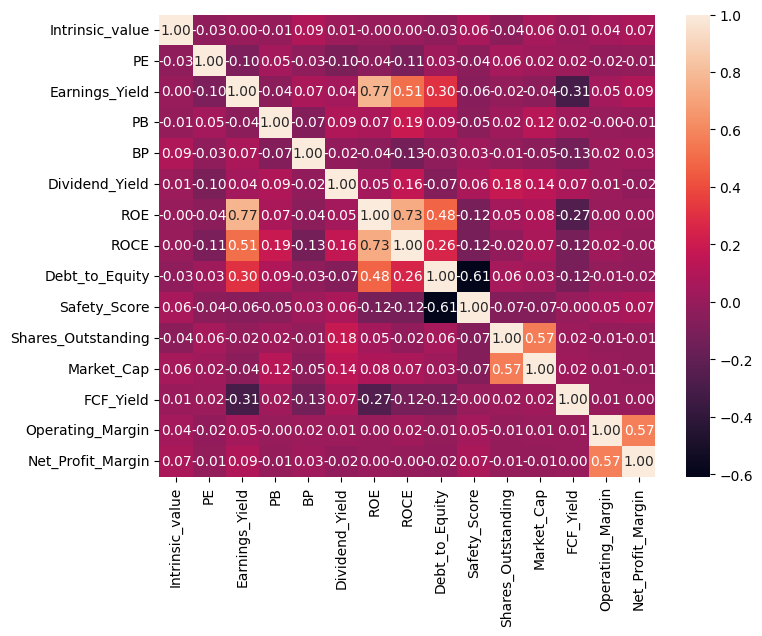

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt='.2f')

In [61]:
corr

,Intrinsic_value,PE,Earnings_Yield,PB,BP,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin
Intrinsic_value,1.000000,-0.026284,0.004194,-0.006045,0.087396,0.014950,-0.002491,0.001874,-0.028362,0.064194,-0.037658,0.057276,0.012074,0.041772,0.068483
PE,-0.026284,1.000000,-0.096334,0.049055,-0.026640,-0.101915,-0.044531,-0.110622,0.025560,-0.044569,0.055644,0.020702,0.016554,-0.019971,-0.012146
Earnings_Yield,0.004194,-0.096334,1.000000,-0.043442,0.069788,0.042555,0.771830,0.513337,0.303802,-0.058281,-0.016724,-0.036505,-0.310665,0.051385,0.085759
PB,-0.006045,0.049055,-0.043442,1.000000,-0.067480,0.093262,0.072944,0.186997,0.094436,-0.050184,0.023466,0.120912,0.020652,-0.002180,-0.008774
BP,0.087396,-0.026640,0.069788,-0.067480,1.000000,-0.018523,-0.044719,-0.129964,-0.028593,0.031260,-0.012150,-0.048036,-0.133111,0.015509,0.029960
Dividend_Yield,0.014950,-0.101915,0.042555,0.093262,-0.018523,1.000000,0.046257,0.164681,-0.068244,0.064505,0.182008,0.137492,0.067389,0.014930,-0.017645
ROE,-0.002491,-0.044531,0.771830,0.072944,-0.044719,0.046257,1.000000,0.730803,0.477531,-0.121816,0.050327,0.077635,-0.266628,0.004517,0.004889
ROCE,0.001874,-0.110622,0.513337,0.186997,-0.129964,0.164681,0.730803,1.000000,0.255337,-0.117961,-0.021959,0.070683,-0.123234,0.021001,-0.004987
Debt_to_Equity,-0.028362,0.025560,0.303802,0.094436,-0.028593,-0.068244,0.477531,0.255337,1.000000,-0.607378,0.056297,0.032919,-0.115537,-0.011136,-0.018923
Safety_Score,0.064194,-0.044569,-0.058281,-0.050184,0.031260,0.064505,-0.121816,-0.117961,-0.607378,1.000000,-0.071118,-0.070768,-0.000725,0.049784,0.065526


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1682 non-null   object 
 1   Price                1682 non-null   float64
 2   EPS                  1682 non-null   float64
 3   Book Value           1682 non-null   float64
 4   Dividend per Share   1682 non-null   float64
 5   Net Income           1682 non-null   float64
 6   Shareholder Equity   1682 non-null   float64
 7   Current Liabilities  1682 non-null   float64
 8   EBIT                 1682 non-null   float64
 9   Total Assets         1682 non-null   float64
 10  Total Liabilities    1682 non-null   float64
 11  Revenue              1682 non-null   float64
 12  Operating Income     1682 non-null   float64
 13  Free Cash Flow       1682 non-null   float64
 14  Intrinsic_value      1682 non-null   float64
 15  PE                   1682 non-null   f

In [66]:
corr=df.corr(numeric_only=True)

<Axes: >

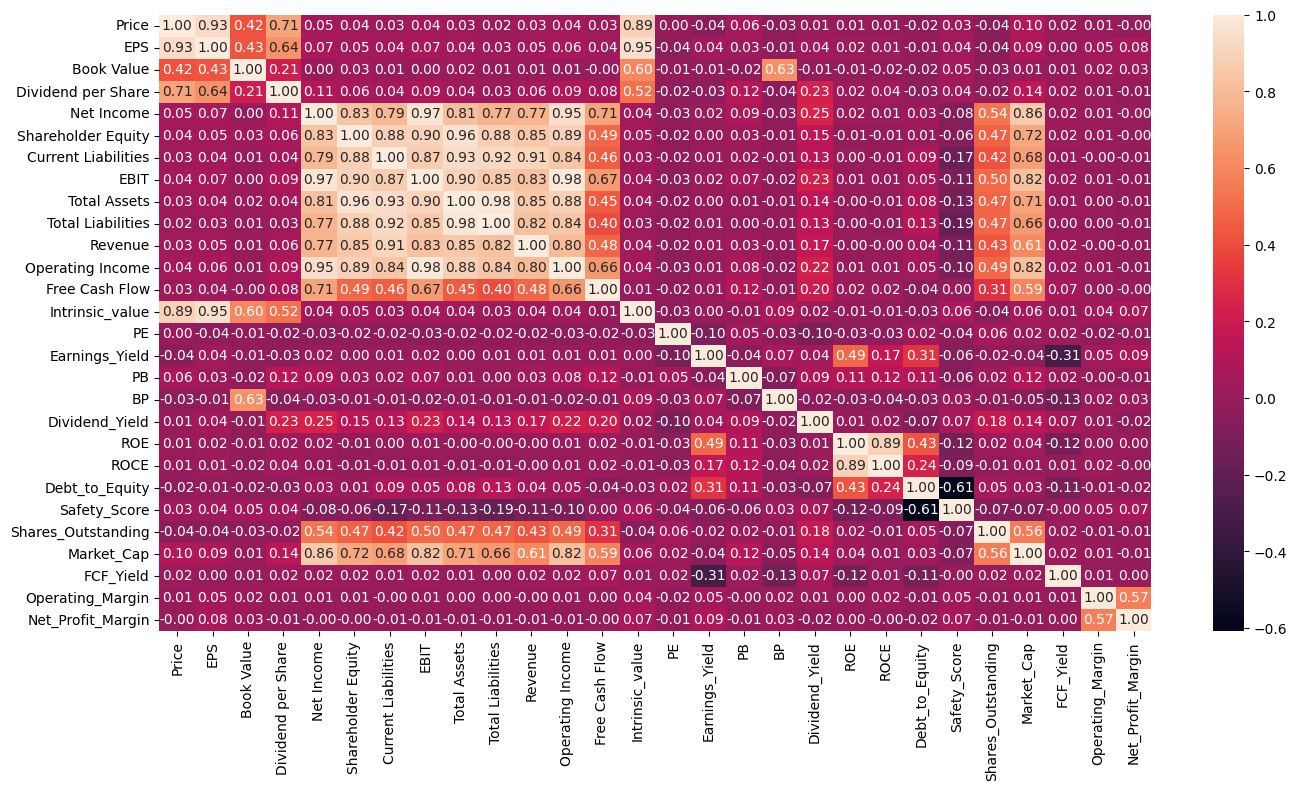

In [68]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,fmt='.2f')

In [69]:
corr

,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,...,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin
Price,1.000000,0.931004,0.421978,0.707659,0.048768,0.043419,0.030485,0.044268,0.028740,0.018927,...,0.005692,0.006684,0.013265,-0.018445,0.029431,-0.040266,0.098694,0.017626,0.008653,-0.000471
EPS,0.931004,1.000000,0.425505,0.638375,0.070625,0.052043,0.044039,0.065999,0.040698,0.032791,...,0.043252,0.015698,0.014779,-0.007057,0.038058,-0.037423,0.085598,0.003948,0.048168,0.077101
Book Value,0.421978,0.425505,1.000000,0.211553,0.004894,0.034704,0.007961,0.004843,0.018421,0.006975,...,-0.013450,-0.014764,-0.016727,-0.023179,0.047524,-0.027439,0.011079,0.006069,0.023013,0.027941
Dividend per Share,0.707659,0.638375,0.211553,1.000000,0.107043,0.059568,0.042135,0.093183,0.040460,0.028345,...,0.229257,0.024001,0.035413,-0.029912,0.040179,-0.015711,0.139727,0.023240,0.008186,-0.006860
Net Income,0.048768,0.070625,0.004894,0.107043,1.000000,0.832074,0.791765,0.972124,0.813533,0.767722,...,0.245395,0.023979,0.010125,0.030713,-0.077301,0.539113,0.859458,0.024580,0.009128,-0.003358
Shareholder Equity,0.043419,0.052043,0.034704,0.059568,0.832074,1.000000,0.884536,0.896518,0.959753,0.878720,...,0.145504,-0.005209,-0.009332,0.013653,-0.057428,0.470030,0.722105,0.017921,0.006228,-0.003812
Current Liabilities,0.030485,0.044039,0.007961,0.042135,0.791765,0.884536,1.000000,0.872216,0.933541,0.921784,...,0.127380,0.000109,-0.006860,0.092387,-0.167060,0.416700,0.684916,0.011807,-0.000767,-0.006618
EBIT,0.044268,0.065999,0.004843,0.093183,0.972124,0.896518,0.872216,1.000000,0.895443,0.853883,...,0.225024,0.013541,0.005759,0.054328,-0.108470,0.496515,0.821481,0.022127,0.007510,-0.005567
Total Assets,0.028740,0.040698,0.018421,0.040460,0.813533,0.959753,0.933541,0.895443,1.000000,0.976256,...,0.136522,-0.002866,-0.011203,0.084422,-0.133568,0.474925,0.707097,0.009689,0.004289,-0.005164
Total Liabilities,0.018927,0.032791,0.006975,0.028345,0.767722,0.878720,0.921784,0.853883,0.976256,1.000000,...,0.133847,-0.001010,-0.012270,0.133533,-0.186139,0.474544,0.662336,0.004436,0.003053,-0.006070


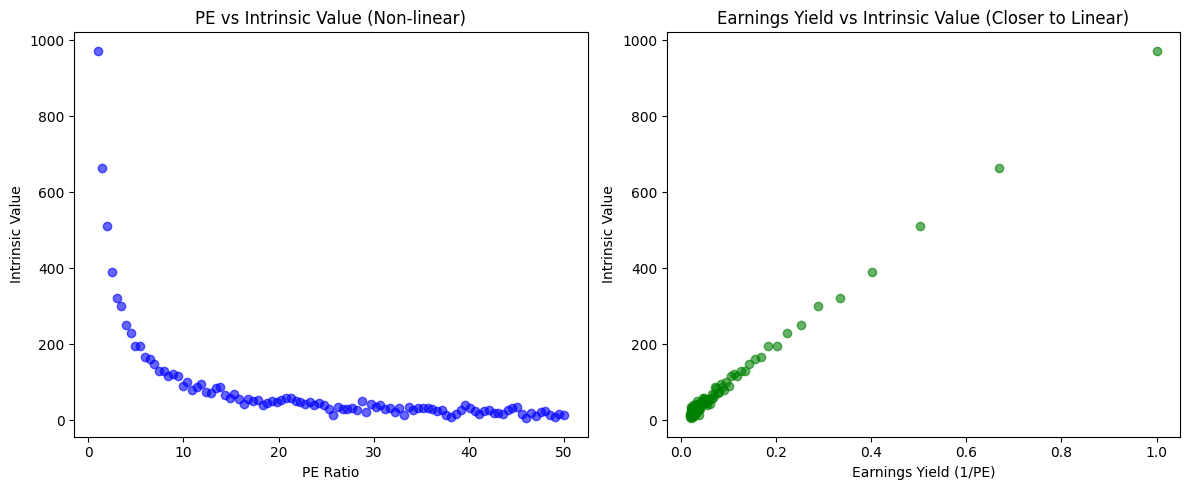

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated PE ratios (X)
PE = np.linspace(1, 50, 100)
# Assume intrinsic value ~ (1/PE) * 1000 + noise
Intrinsic_value = (1/PE) * 1000 + np.random.normal(0, 10, 100)

# Earnings Yield transformation (1/PE)
Earnings_Yield = 1/PE

# Plot PE vs Intrinsic Value (non-linear)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(PE, Intrinsic_value, color="blue", alpha=0.6)
plt.title("PE vs Intrinsic Value (Non-linear)")
plt.xlabel("PE Ratio")
plt.ylabel("Intrinsic Value")

# Plot Earnings Yield vs Intrinsic Value (linearized)
plt.subplot(1,2,2)
plt.scatter(Earnings_Yield, Intrinsic_value, color="green", alpha=0.6)
plt.title("Earnings Yield vs Intrinsic Value (Closer to Linear)")
plt.xlabel("Earnings Yield (1/PE)")
plt.ylabel("Intrinsic Value")

plt.tight_layout()
plt.show()


In [80]:
df[['Intrinsic_value','Earnings_Yield','Safety_Score']].corr(method='spearman')


,Intrinsic_value,Earnings_Yield,Safety_Score
Intrinsic_value,1.000000,0.180662,0.102222
Earnings_Yield,0.180662,1.000000,0.071379
Safety_Score,0.102222,0.071379,1.000000


<Axes: xlabel='Earnings_Yield', ylabel='Intrinsic_value'>

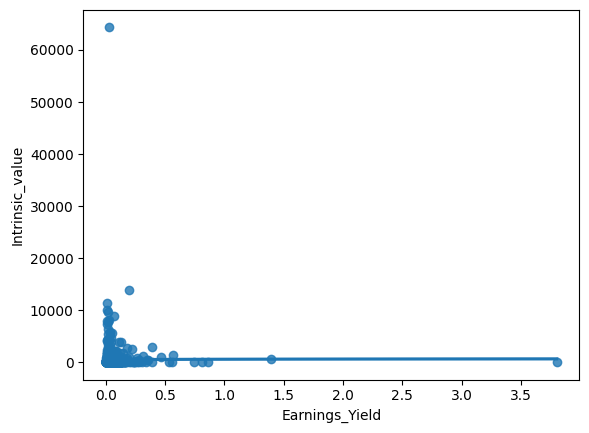

In [82]:
import seaborn as sns
sns.regplot(x='Earnings_Yield', y='Intrinsic_value', data=df, logx=True)


In [84]:
df.columns

Index(['Ticker', 'Price', 'EPS', 'Book Value', 'Dividend per Share',
       'Net Income', 'Shareholder Equity', 'Current Liabilities', 'EBIT',
       'Total Assets', 'Total Liabilities', 'Revenue', 'Operating Income',
       'Free Cash Flow', 'Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin'],
      dtype='object')

In [208]:
dfnew=df[['Price','EPS', 'Book Value', 'Dividend per Share','Earnings_Yield', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin','Intrinsic_value','PE','PB']]

In [203]:
corr=dfnew.corr(numeric_only=True)

<Axes: >

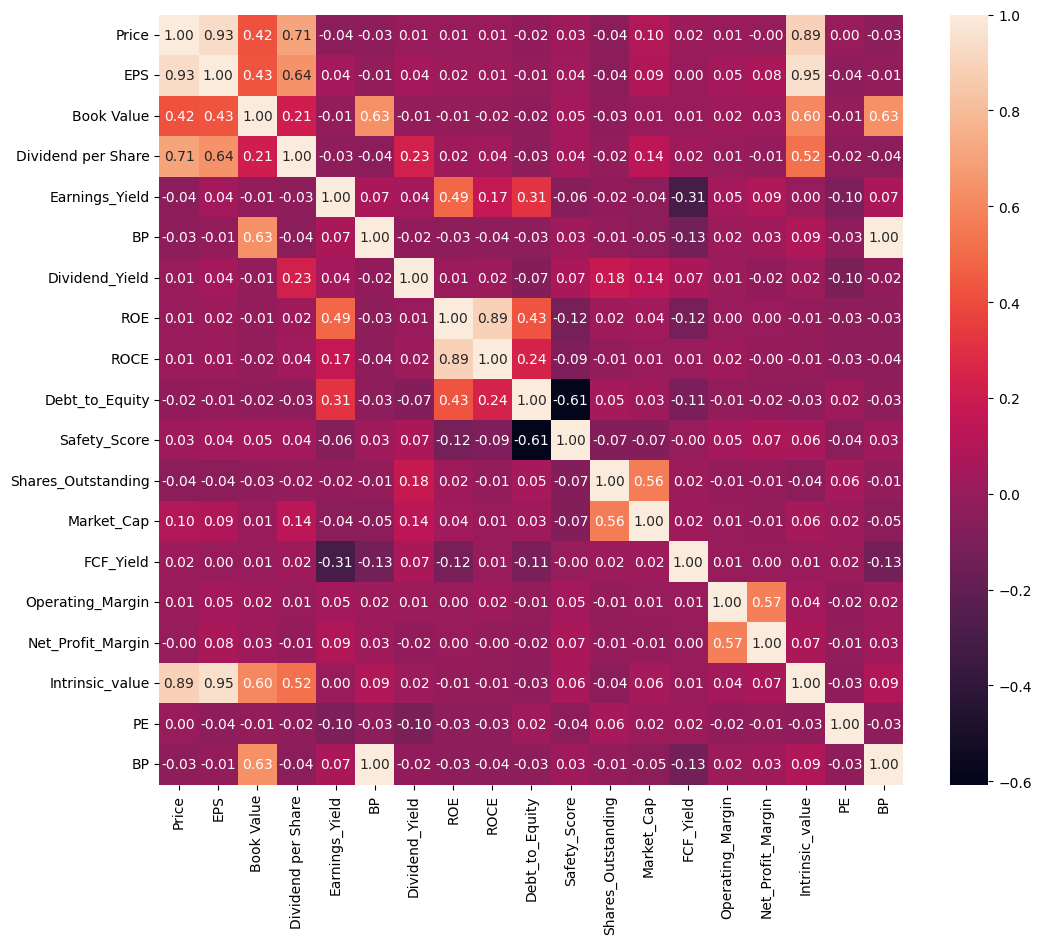

In [204]:
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,fmt='.2f')

In [205]:
dfnew.head()

,Price,EPS,Book Value,Dividend per Share,Earnings_Yield,BP,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin,Intrinsic_value,PE,BP
0,240.800003,17.40,121.679,1.25,0.072259,0.505311,0.005191,0.145276,0.189866,0.653185,0.604893,3.584845e+07,8.632306e+09,-0.052007,0.110349,0.068421,218.259773,13.839081,0.505311
1,1078.900024,26.56,180.591,12.00,0.024618,0.167384,0.011122,0.143706,0.117041,1.798070,0.357389,3.822666e+08,4.124274e+11,-0.059795,0.487013,0.385268,328.513594,40.621236,0.167384
2,22.360001,2.45,18.139,0.00,0.109571,0.811225,0.000000,0.082606,0.054726,0.866560,0.535745,1.034694e+08,2.313576e+09,0.171769,-0.009425,0.034929,31.621391,9.126531,0.811225
3,31160.000000,440.87,1639.135,160.00,0.014149,0.052604,0.005135,0.257822,0.397745,0.632600,0.612520,1.079836e+07,3.364770e+11,0.008907,0.163467,0.107153,4032.309830,70.678431,0.052604
4,49.009998,1.16,77.600,0.00,0.023669,1.583350,0.000000,0.014962,0.012559,0.098702,0.910165,1.801897e+07,8.831095e+08,0.013261,0.526376,0.571311,45.004000,42.249999,1.583350


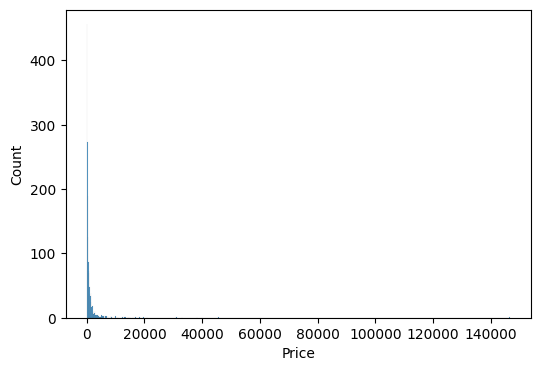

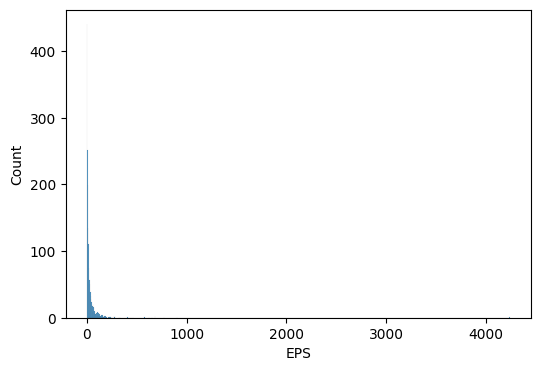

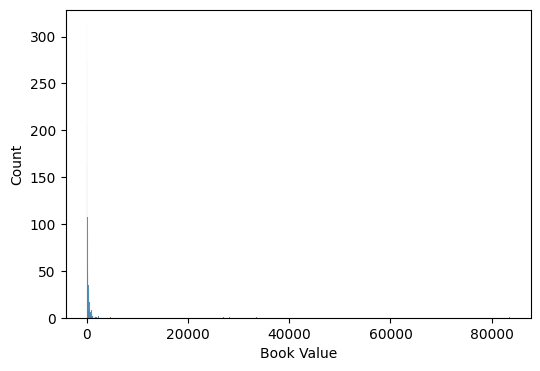

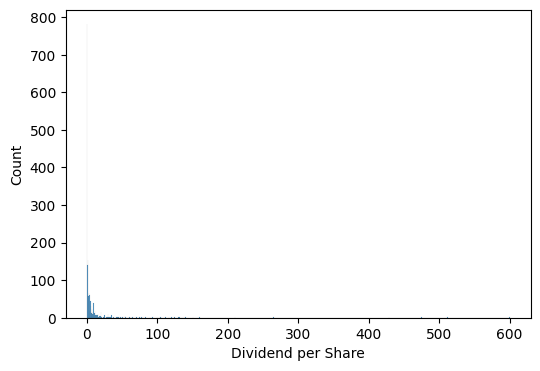

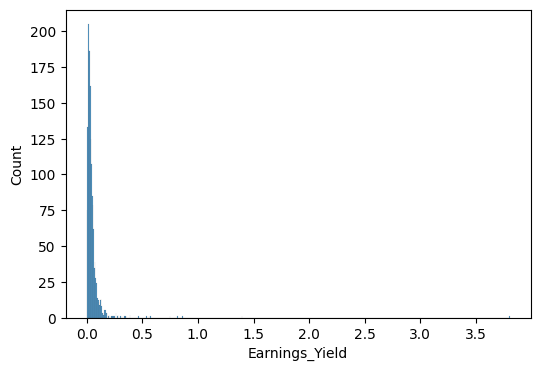

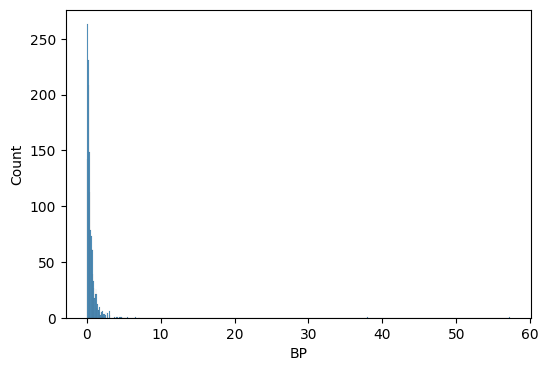

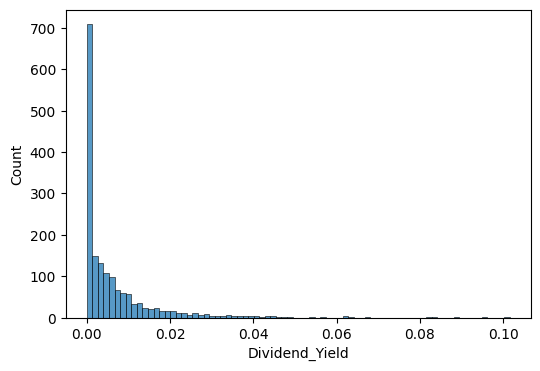

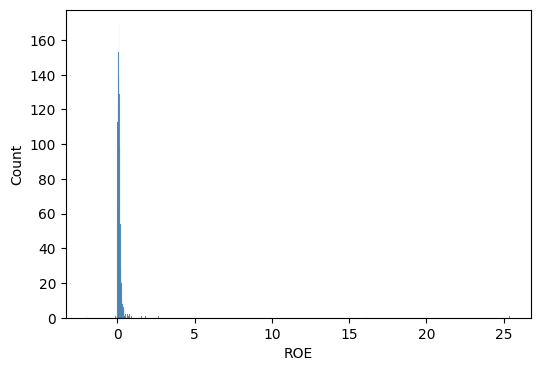

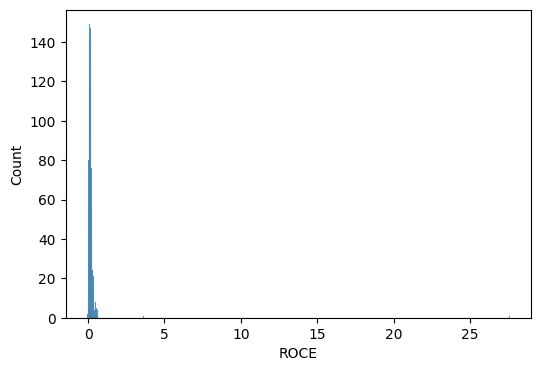

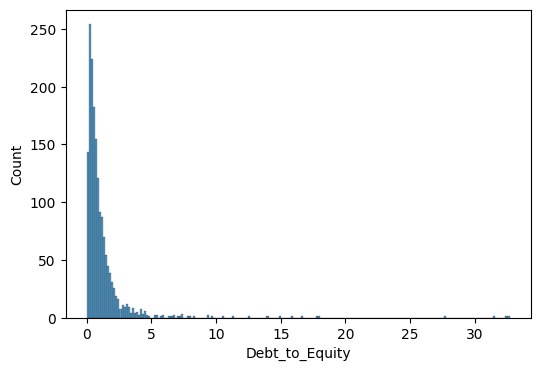

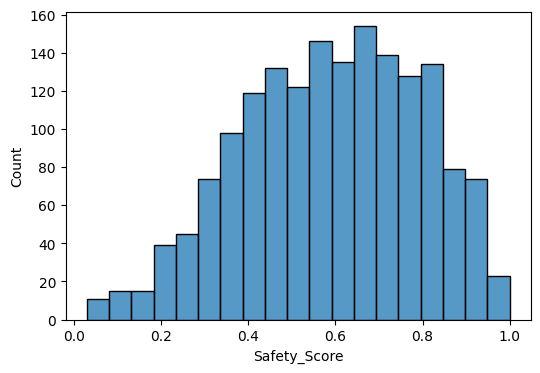

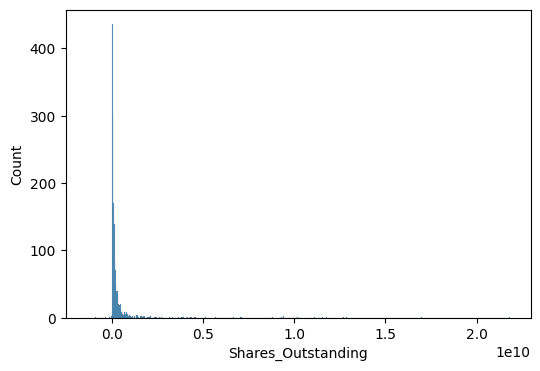

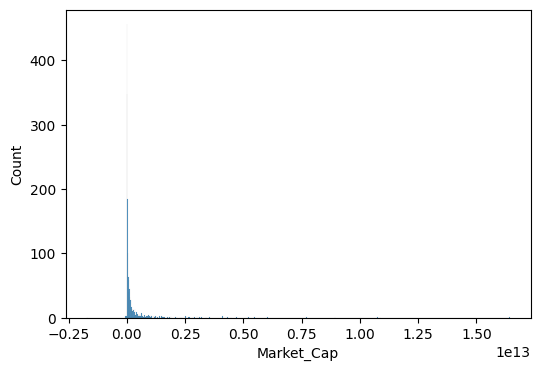

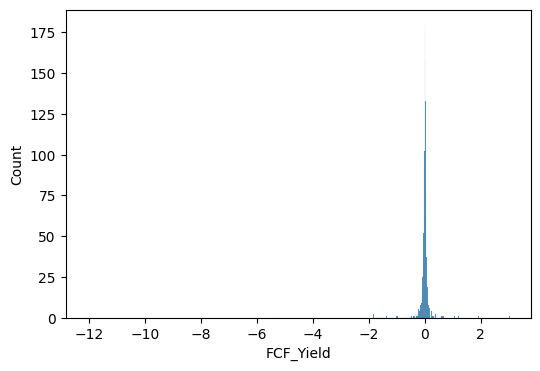

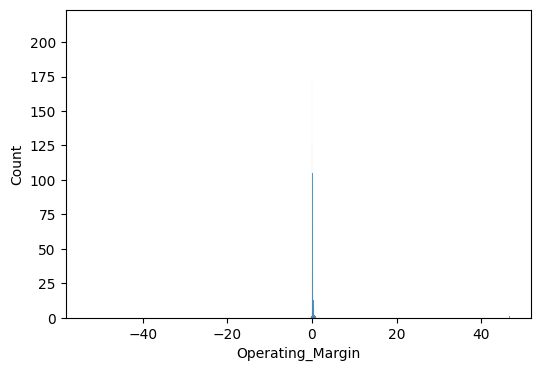

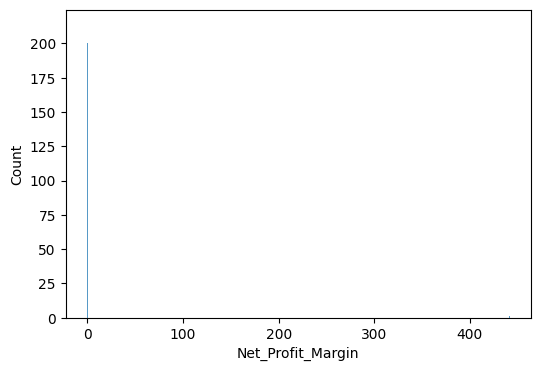

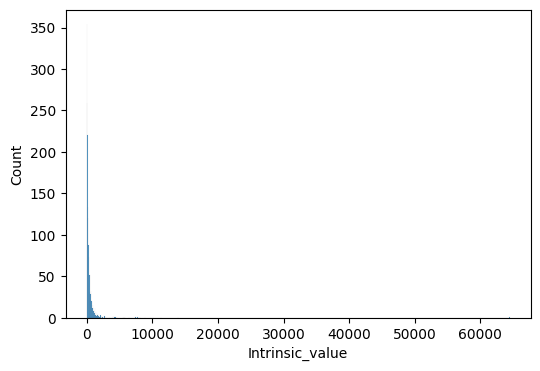

In [93]:
for col in dfnew.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(dfnew[col])


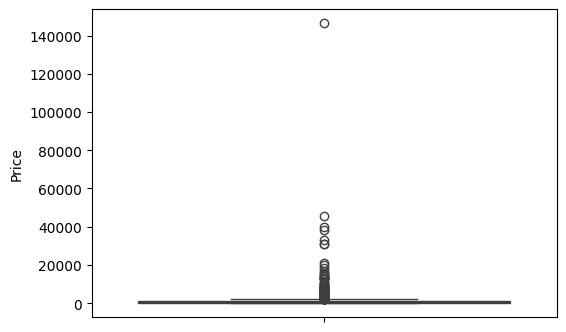

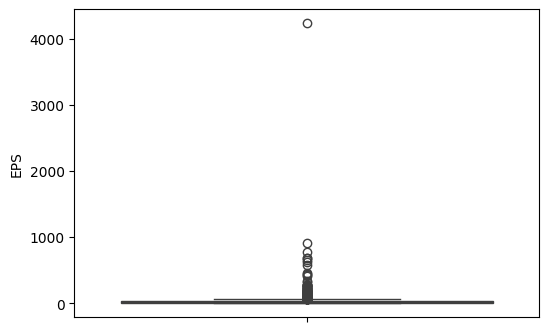

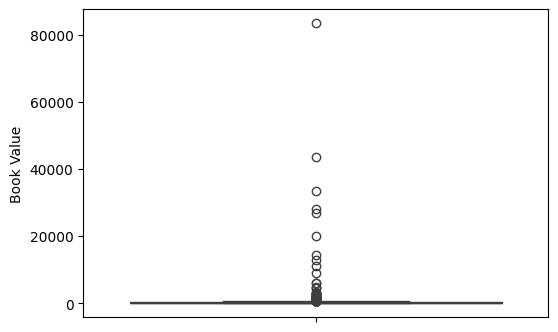

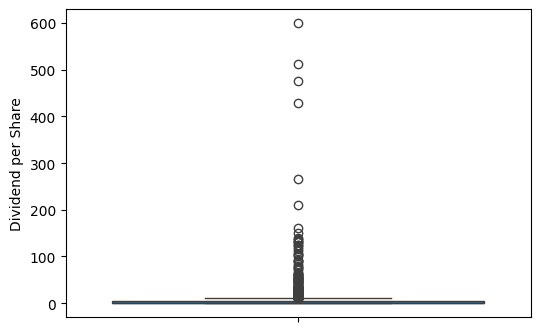

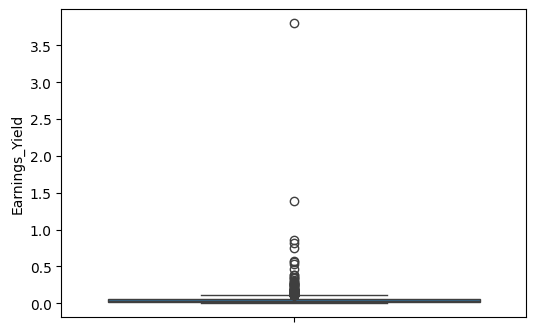

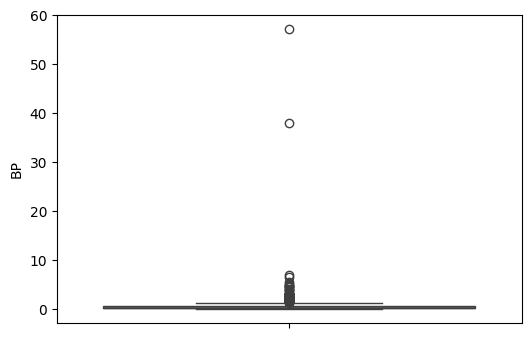

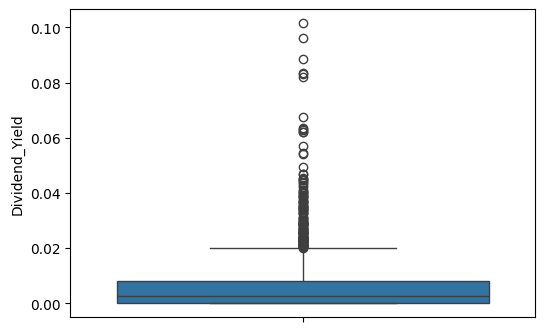

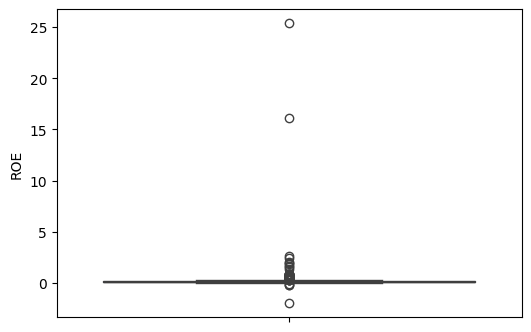

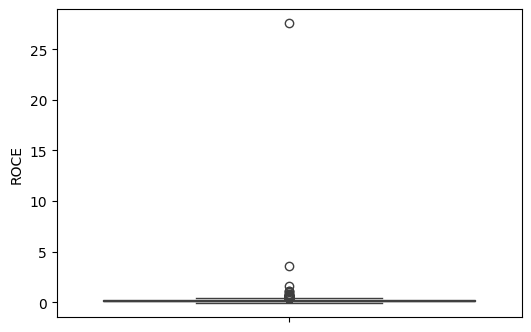

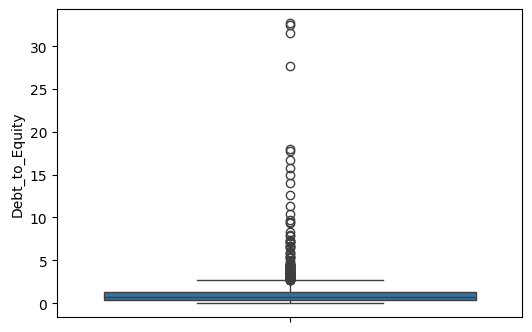

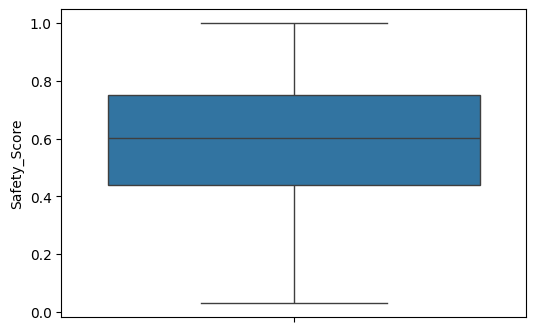

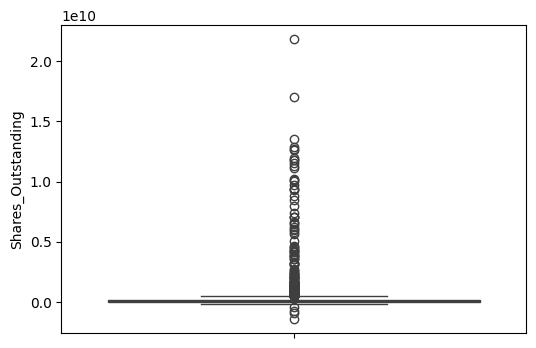

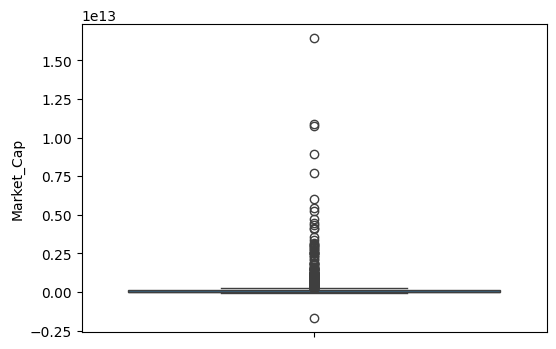

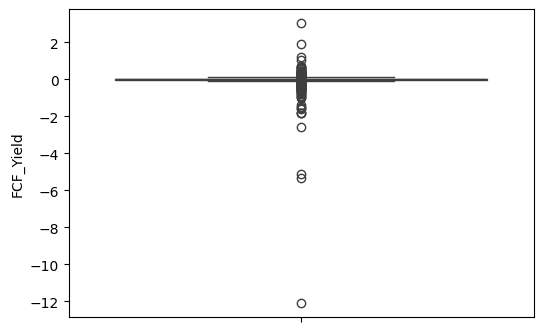

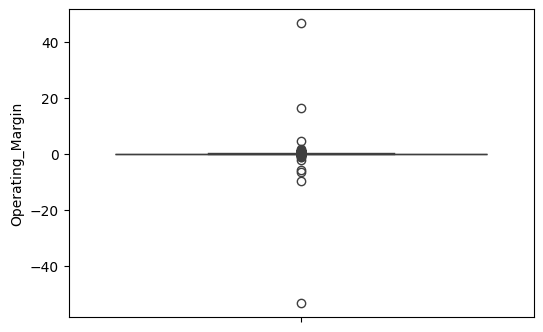

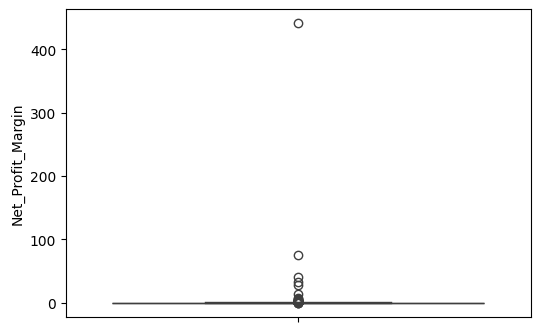

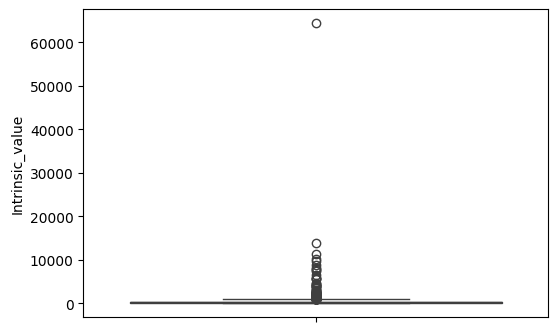

In [94]:
for col in dfnew.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(dfnew[col])


In [212]:
for col in dfnew.columns:
    count = (dfnew[col] <=0).sum()
    print(f"{col}: {count}")


Price: 0
EPS: 0
Book Value: 0
Dividend per Share: 598
Earnings_Yield: 0
BP: 0
Dividend_Yield: 598
ROE: 16
ROCE: 13
Debt_to_Equity: 0
Safety_Score: 0
Shares_Outstanding: 16
Market_Cap: 16
FCF_Yield: 706
Operating_Margin: 91
Net_Profit_Margin: 16
Intrinsic_value: 0
PE: 0
PB: 0


In [213]:
logt=['Price','EPS','Book Value','Earnings_Yield','BP','Debt_to_Equity','Intrinsic_value','PE','PB']

In [214]:
power=['Dividend per Share','Dividend_Yield','ROE','ROCE','Market_Cap','FCF_Yield','Operating_Margin','Net_Profit_Margin']

In [218]:
dfnew['Net_Profit_Margin'].skew()


np.float64(38.37536173736291)

In [217]:
dfnew.dropna(inplace=True)

In [216]:
dfnew = dfnew.replace([np.inf, -np.inf], np.nan)

In [219]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1681
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1676 non-null   float64
 1   EPS                 1676 non-null   float64
 2   Book Value          1676 non-null   float64
 3   Dividend per Share  1676 non-null   float64
 4   Earnings_Yield      1676 non-null   float64
 5   BP                  1676 non-null   float64
 6   Dividend_Yield      1676 non-null   float64
 7   ROE                 1676 non-null   float64
 8   ROCE                1676 non-null   float64
 9   Debt_to_Equity      1676 non-null   float64
 10  Safety_Score        1676 non-null   float64
 11  Shares_Outstanding  1676 non-null   float64
 12  Market_Cap          1676 non-null   float64
 13  FCF_Yield           1676 non-null   float64
 14  Operating_Margin    1676 non-null   float64
 15  Net_Profit_Margin   1676 non-null   float64
 16  Intrinsic_v

In [220]:
dfnew.head()

,Price,EPS,Book Value,Dividend per Share,Earnings_Yield,BP,Dividend_Yield,ROE,ROCE,Debt_to_Equity,Safety_Score,Shares_Outstanding,Market_Cap,FCF_Yield,Operating_Margin,Net_Profit_Margin,Intrinsic_value,PE,PB
0,240.800003,17.40,121.679,1.25,0.072259,0.505311,0.005191,0.145276,0.189866,0.653185,0.604893,3.584845e+07,8.632306e+09,-0.052007,0.110349,0.068421,218.259773,13.839081,1.978977
1,1078.900024,26.56,180.591,12.00,0.024618,0.167384,0.011122,0.143706,0.117041,1.798070,0.357389,3.822666e+08,4.124274e+11,-0.059795,0.487013,0.385268,328.513594,40.621236,5.974273
2,22.360001,2.45,18.139,0.00,0.109571,0.811225,0.000000,0.082606,0.054726,0.866560,0.535745,1.034694e+08,2.313576e+09,0.171769,-0.009425,0.034929,31.621391,9.126531,1.232703
3,31160.000000,440.87,1639.135,160.00,0.014149,0.052604,0.005135,0.257822,0.397745,0.632600,0.612520,1.079836e+07,3.364770e+11,0.008907,0.163467,0.107153,4032.309830,70.678431,19.010027
4,49.009998,1.16,77.600,0.00,0.023669,1.583350,0.000000,0.014962,0.012559,0.098702,0.910165,1.801897e+07,8.831095e+08,0.013261,0.526376,0.571311,45.004000,42.249999,0.631572


In [221]:
for col in logt:
    
    dfnew[col + '_log'] = np.log1p(dfnew[col])


In [222]:
from sklearn.preprocessing import PowerTransformer

In [223]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
dfnew[ [col + '_power' for col in power] ] = pt.fit_transform(dfnew[power])

In [224]:
dfnew['Price_log']

0        5.488111
1        6.984624
2        3.151025
3       10.346923
4        3.912223
          ...    
1677     9.578450
1678     4.356709
1679     5.829093
1680     6.898159
1681     7.610556
Name: Price_log, Length: 1676, dtype: float64

In [225]:
dfnew.columns

Index(['Price', 'EPS', 'Book Value', 'Dividend per Share', 'Earnings_Yield',
       'BP', 'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin', 'Intrinsic_value', 'PE', 'PB', 'Price_log',
       'EPS_log', 'Book Value_log', 'Earnings_Yield_log', 'BP_log',
       'Debt_to_Equity_log', 'Intrinsic_value_log', 'PE_log', 'PB_log',
       'Dividend per Share_power', 'Dividend_Yield_power', 'ROE_power',
       'ROCE_power', 'Market_Cap_power', 'FCF_Yield_power',
       'Operating_Margin_power', 'Net_Profit_Margin_power'],
      dtype='object')

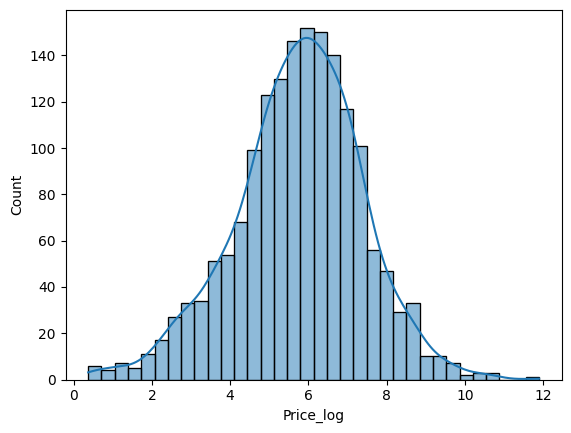

In [226]:
sns.histplot(x='Price_log', data=dfnew, kde=True)
plt.show()

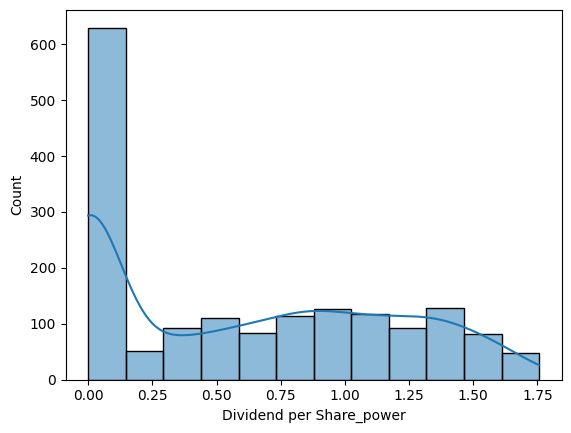

In [227]:
sns.histplot(x='Dividend per Share_power', data=dfnew, kde=True)
plt.show()

In [228]:
dfnew.columns

Index(['Price', 'EPS', 'Book Value', 'Dividend per Share', 'Earnings_Yield',
       'BP', 'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin', 'Intrinsic_value', 'PE', 'PB', 'Price_log',
       'EPS_log', 'Book Value_log', 'Earnings_Yield_log', 'BP_log',
       'Debt_to_Equity_log', 'Intrinsic_value_log', 'PE_log', 'PB_log',
       'Dividend per Share_power', 'Dividend_Yield_power', 'ROE_power',
       'ROCE_power', 'Market_Cap_power', 'FCF_Yield_power',
       'Operating_Margin_power', 'Net_Profit_Margin_power'],
      dtype='object')

In [229]:
tf=dfnew[['Price_log', 'EPS_log',
       'Book Value_log', 'Earnings_Yield_log', 'BP_log', 'Debt_to_Equity_log',
       'Intrinsic_value_log', 'Dividend per Share_power',
       'Dividend_Yield_power', 'ROE_power', 'ROCE_power', 'Market_Cap_power',
       'FCF_Yield_power', 'Operating_Margin_power', 'Net_Profit_Margin_power','Safety_Score','PE_log','PB_log']]

In [230]:
tf.to_csv("C:/Users/tinup/machine Learning/marketDt_final.csv", index=False)

In [143]:
tfdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1681
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price_log                 1676 non-null   float64
 1   EPS_log                   1676 non-null   float64
 2   Book Value_log            1676 non-null   float64
 3   Earnings_Yield_log        1676 non-null   float64
 4   BP_log                    1676 non-null   float64
 5   Debt_to_Equity_log        1676 non-null   float64
 6   Intrinsic_value_log       1676 non-null   float64
 7   Dividend per Share_power  1676 non-null   float64
 8   Dividend_Yield_power      1676 non-null   float64
 9   ROE_power                 1676 non-null   float64
 10  ROCE_power                1676 non-null   float64
 11  Market_Cap_power          1676 non-null   float64
 12  FCF_Yield_power           1676 non-null   float64
 13  Operating_Margin_power    1676 non-null   float64
 14  Net_Profit_Ma

In [144]:
corr=tfdata.corr(numeric_only=True)

<Axes: >

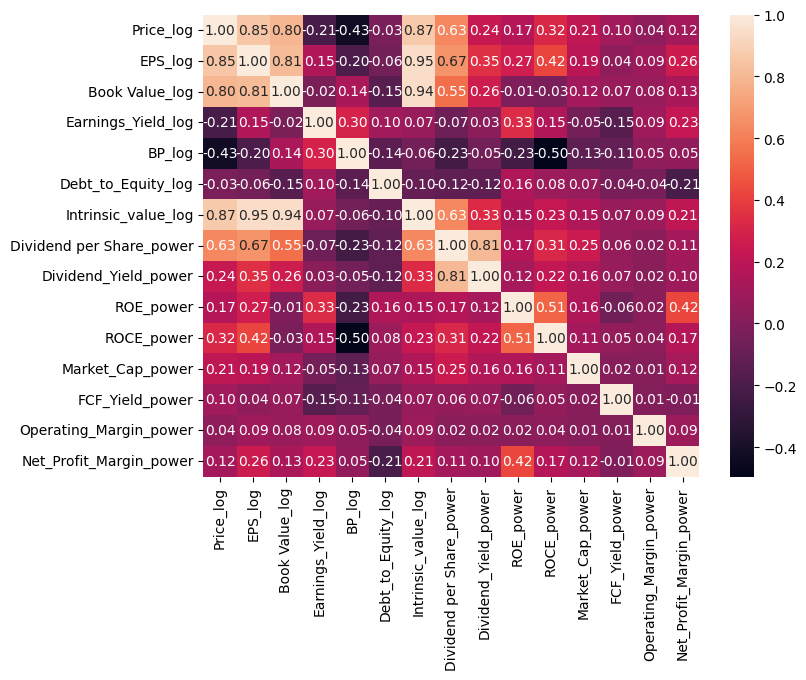

In [146]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt='.2f')

In [187]:
tfdata.to_csv("C:/Users/tinup/machine Learning/marketdata_final.csv", index=False)

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [2]:
df=pd.read_csv('marketdata_Feature_engineered.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ticker               1682 non-null   object 
 1   Price                1682 non-null   float64
 2   EPS                  1682 non-null   float64
 3   Book Value           1682 non-null   float64
 4   Dividend per Share   1682 non-null   float64
 5   Net Income           1682 non-null   float64
 6   Shareholder Equity   1682 non-null   float64
 7   Current Liabilities  1682 non-null   float64
 8   EBIT                 1682 non-null   float64
 9   Total Assets         1682 non-null   float64
 10  Total Liabilities    1682 non-null   float64
 11  Revenue              1682 non-null   float64
 12  Operating Income     1682 non-null   float64
 13  Free Cash Flow       1682 non-null   float64
 14  Intrinsic_value      1682 non-null   float64
 15  PE                   1682 non-null   f

In [4]:
df['ROA']=df['Net Income']/df['Total Assets']

In [5]:
df['Asset_Turnover']=df['Revenue']/df['Total Assets']

In [6]:
df['FCF_Torevenue']=df['Free Cash Flow']/df['Revenue']

In [7]:
df['Cashflow_pershare']=df['Free Cash Flow']/df['Shares_Outstanding']

In [9]:
df['EV']=df['Market_Cap']+df['Total Liabilities']

In [10]:
df['EV_to_sales']=df['EV']/df['Revenue']

In [38]:
df.columns

Index(['Ticker', 'Price', 'EPS', 'Book Value', 'Dividend per Share',
       'Net Income', 'Shareholder Equity', 'Current Liabilities', 'EBIT',
       'Total Assets', 'Total Liabilities', 'Revenue', 'Operating Income',
       'Free Cash Flow', 'Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin', 'ROA', 'Asset_Turnover', 'FCF_Torevenue',
       'Cashflow_pershare', 'EV', 'EV_to_sales'],
      dtype='object')

In [39]:
dfnew=df[[ 'Ticker','Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin', 'ROA', 'Asset_Turnover', 'FCF_Torevenue',
       'Cashflow_pershare', 'EV', 'EV_to_sales','Price', 'EPS', 'Book Value', 'Dividend per Share']]

In [40]:
dfnew = dfnew.replace([np.inf, -np.inf], np.nan)

In [41]:
dfnew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Ticker              1682 non-null   object 
 1   Intrinsic_value     1682 non-null   float64
 2   PE                  1682 non-null   float64
 3   Earnings_Yield      1682 non-null   float64
 4   PB                  1682 non-null   float64
 5   BP                  1682 non-null   float64
 6   Dividend_Yield      1682 non-null   float64
 7   ROE                 1682 non-null   float64
 8   ROCE                1682 non-null   float64
 9   Debt_to_Equity      1682 non-null   float64
 10  Safety_Score        1682 non-null   float64
 11  Shares_Outstanding  1682 non-null   float64
 12  Market_Cap          1682 non-null   float64
 13  FCF_Yield           1682 non-null   float64
 14  Operating_Margin    1676 non-null   float64
 15  Net_Profit_Margin   1676 non-null   float64
 16  ROA   

In [42]:
dfnew.dropna(inplace=True)

In [44]:
for col in dfnew.columns:
    if pd.api.types.is_numeric_dtype(dfnew[col]):  # only numeric
        count = (dfnew[col] <= 0).sum()
        print(f"{col}: {count}")


Intrinsic_value: 0
PE: 0
Earnings_Yield: 0
PB: 0
BP: 0
Dividend_Yield: 594
ROE: 15
ROCE: 13
Debt_to_Equity: 0
Safety_Score: 0
Shares_Outstanding: 15
Market_Cap: 15
FCF_Yield: 702
Operating_Margin: 85
Net_Profit_Margin: 15
ROA: 15
Asset_Turnover: 0
FCF_Torevenue: 703
Cashflow_pershare: 702
EV: 10
EV_to_sales: 10
Price: 0
EPS: 0
Book Value: 0
Dividend per Share: 594


In [45]:
logt=['Price','EPS','Book Value','Earnings_Yield','BP','Debt_to_Equity','Intrinsic_value','PE','PB','Safety_Score','Asset_Turnover']

In [46]:
power=['Dividend per Share','Dividend_Yield','ROE','ROCE','Market_Cap','FCF_Yield','Operating_Margin','Net_Profit_Margin','ROA','FCF_Torevenue',
      'Cashflow_pershare','EV','EV_to_sales']

In [47]:
for col in logt:
    
    dfnew[col + '_log'] = np.log1p(dfnew[col])


In [48]:
from sklearn.preprocessing import PowerTransformer

In [49]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
dfnew[ [col + '_power' for col in power] ] = pt.fit_transform(dfnew[power])

In [50]:
dfnew.columns

Index(['Ticker', 'Intrinsic_value', 'PE', 'Earnings_Yield', 'PB', 'BP',
       'Dividend_Yield', 'ROE', 'ROCE', 'Debt_to_Equity', 'Safety_Score',
       'Shares_Outstanding', 'Market_Cap', 'FCF_Yield', 'Operating_Margin',
       'Net_Profit_Margin', 'ROA', 'Asset_Turnover', 'FCF_Torevenue',
       'Cashflow_pershare', 'EV', 'EV_to_sales', 'Price', 'EPS', 'Book Value',
       'Dividend per Share', 'Price_log', 'EPS_log', 'Book Value_log',
       'Earnings_Yield_log', 'BP_log', 'Debt_to_Equity_log',
       'Intrinsic_value_log', 'PE_log', 'PB_log', 'Safety_Score_log',
       'Asset_Turnover_log', 'Dividend per Share_power',
       'Dividend_Yield_power', 'ROE_power', 'ROCE_power', 'Market_Cap_power',
       'FCF_Yield_power', 'Operating_Margin_power', 'Net_Profit_Margin_power',
       'ROA_power', 'FCF_Torevenue_power', 'Cashflow_pershare_power',
       'EV_power', 'EV_to_sales_power'],
      dtype='object')

In [53]:
tff=dfnew[['Ticker','Intrinsic_value','Price_log', 'EPS_log', 'Book Value_log', 'Earnings_Yield_log',
       'BP_log', 'Debt_to_Equity_log', 'Intrinsic_value_log', 'PE_log',
       'PB_log', 'Safety_Score_log', 'Asset_Turnover_log',
       'Dividend per Share_power', 'Dividend_Yield_power', 'ROE_power',
       'ROCE_power', 'Market_Cap_power', 'FCF_Yield_power',
       'Operating_Margin_power', 'Net_Profit_Margin_power', 'ROA_power',
       'FCF_Torevenue_power', 'Cashflow_pershare_power', 'EV_power',
       'EV_to_sales_power']]

In [26]:
dfnew['Price_log']

0        5.488111
1        6.984624
2        3.151025
3       10.346923
4        3.912223
          ...    
1677     9.578450
1678     4.356709
1679     5.829093
1680     6.898159
1681     7.610556
Name: Price_log, Length: 1676, dtype: float64

In [27]:
dfnew['Price']

0         240.800003
1        1078.900024
2          22.360001
3       31160.000000
4          49.009998
            ...     
1677    14449.000000
1678       77.000000
1679      339.049988
1680      989.450012
1681     2018.400024
Name: Price, Length: 1676, dtype: float64

In [29]:
tf.columns

Index(['Price_log', 'EPS_log', 'Book Value_log', 'Earnings_Yield_log',
       'BP_log', 'Debt_to_Equity_log', 'Intrinsic_value_log', 'PE_log',
       'PB_log', 'Safety_Score_log', 'Asset_Turnover_log',
       'Dividend per Share_power', 'Dividend_Yield_power', 'ROE_power',
       'ROCE_power', 'Market_Cap_power', 'FCF_Yield_power',
       'Operating_Margin_power', 'Net_Profit_Margin_power', 'ROA_power',
       'FCF_Torevenue_power', 'Cashflow_pershare_power', 'EV_power',
       'EV_to_sales_power'],
      dtype='object')

In [36]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Price_log                 1676 non-null   float64
 1   EPS_log                   1676 non-null   float64
 2   Book Value_log            1676 non-null   float64
 3   Earnings_Yield_log        1676 non-null   float64
 4   BP_log                    1676 non-null   float64
 5   Debt_to_Equity_log        1676 non-null   float64
 6   Intrinsic_value_log       1676 non-null   float64
 7   PE_log                    1676 non-null   float64
 8   PB_log                    1676 non-null   float64
 9   Safety_Score_log          1676 non-null   float64
 10  Asset_Turnover_log        1676 non-null   float64
 11  Dividend per Share_power  1676 non-null   float64
 12  Dividend_Yield_power      1676 non-null   float64
 13  ROE_power                 1676 non-null   float64
 14  ROCE_power   

In [54]:
tff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1676 entries, 0 to 1681
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ticker                    1676 non-null   object 
 1   Intrinsic_value           1676 non-null   float64
 2   Price_log                 1676 non-null   float64
 3   EPS_log                   1676 non-null   float64
 4   Book Value_log            1676 non-null   float64
 5   Earnings_Yield_log        1676 non-null   float64
 6   BP_log                    1676 non-null   float64
 7   Debt_to_Equity_log        1676 non-null   float64
 8   Intrinsic_value_log       1676 non-null   float64
 9   PE_log                    1676 non-null   float64
 10  PB_log                    1676 non-null   float64
 11  Safety_Score_log          1676 non-null   float64
 12  Asset_Turnover_log        1676 non-null   float64
 13  Dividend per Share_power  1676 non-null   float64
 14  Dividend_Yiel

In [55]:
tff.to_csv("C:/Users/tinup/machine Learning/MARKET_finalData.csv", index=False)

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings( "ignore")

In [139]:
df=pd.read_csv('MARKET_finalData.csv')

In [119]:
df.head()

,Ticker,Intrinsic_value,Price_log,EPS_log,Book Value_log,Earnings_Yield_log,BP_log,Debt_to_Equity_log,Intrinsic_value_log,PE_log,...,ROCE_power,Market_Cap_power,FCF_Yield_power,Operating_Margin_power,Net_Profit_Margin_power,ROA_power,FCF_Torevenue_power,Cashflow_pershare_power,EV_power,EV_to_sales_power
0,20MICRONS.NS,218.259773,5.488111,2.912351,4.809571,0.069768,0.409000,0.502704,5.390257,2.697264,...,0.126156,4.330901e+09,-0.051091,0.110508,0.062576,0.063549,-0.048561,-12.796532,5.027717e+09,1.091375
1,360ONE.NS,328.513594,6.984624,3.316365,5.201757,0.024320,0.154766,1.028930,5.797618,3.728611,...,0.089848,1.831563e+11,-0.058590,0.489806,0.249877,0.042333,-0.761879,-67.057008,2.055419e+11,10.625801
2,3IINFOLTD.NS,31.621391,3.151025,1.238374,2.951728,0.103973,0.594004,0.624097,3.484968,2.315159,...,0.048098,1.209974e+09,0.181876,-0.009423,0.033345,0.037423,0.055616,3.795935,2.254749e+09,0.628612
3,3MINDIA.NS,4032.309830,10.346923,6.091016,7.402534,0.014049,0.051267,0.490174,8.302343,4.272190,...,0.186718,1.503898e+11,0.008934,0.163810,0.093430,0.092159,0.068755,262.609431,1.348263e+11,5.083777
4,3PLAND.NS,45.004000,3.912223,0.770108,4.364372,0.023393,0.949087,0.094129,3.828728,3.766997,...,0.012182,4.761049e+08,0.013322,0.529608,0.314831,0.012913,0.348481,0.647834,4.909526e+08,13.385111


In [141]:
df['Intrinsic_value'].describe()

count     1676.000000
mean       429.955182
std       1803.283629
min          0.525642
25%         66.154189
50%        158.711738
75%        375.970179
max      64445.182852
Name: Intrinsic_value, dtype: float64

In [4]:
df.columns

Index(['Ticker', 'Intrinsic_value', 'Price_log', 'EPS_log', 'Book Value_log',
       'Earnings_Yield_log', 'BP_log', 'Debt_to_Equity_log',
       'Intrinsic_value_log', 'PE_log', 'PB_log', 'Safety_Score_log',
       'Asset_Turnover_log', 'Dividend per Share_power',
       'Dividend_Yield_power', 'ROE_power', 'ROCE_power', 'Market_Cap_power',
       'FCF_Yield_power', 'Operating_Margin_power', 'Net_Profit_Margin_power',
       'ROA_power', 'FCF_Torevenue_power', 'Cashflow_pershare_power',
       'EV_power', 'EV_to_sales_power'],
      dtype='object')

In [120]:
X=df[['Book Value_log','Earnings_Yield_log','BP_log','Debt_to_Equity_log',
     'Asset_Turnover_log','Dividend per Share_power','ROE_power','ROCE_power',
     'FCF_Yield_power','Operating_Margin_power','Net_Profit_Margin_power','ROA_power',
     'FCF_Torevenue_power','Cashflow_pershare_power','EV_power','EV_to_sales_power','Safety_Score_log']]

In [122]:
X['BP_x_EarningsYield'] = X['BP_log'] * X['Earnings_Yield_log']

In [123]:
X.columns

Index(['Book Value_log', 'Earnings_Yield_log', 'BP_log', 'Debt_to_Equity_log',
       'Asset_Turnover_log', 'Dividend per Share_power', 'ROE_power',
       'ROCE_power', 'FCF_Yield_power', 'Operating_Margin_power',
       'Net_Profit_Margin_power', 'ROA_power', 'FCF_Torevenue_power',
       'Cashflow_pershare_power', 'EV_power', 'EV_to_sales_power',
       'Safety_Score_log', 'BP_x_EarningsYield'],
      dtype='object')

In [124]:
x=X[['Safety_Score_log',
        'Dividend per Share_power', 'ROE_power',
        'Operating_Margin_power', 'Net_Profit_Margin_power',
        'FCF_Torevenue_power', 'Cashflow_pershare_power',
        'EV_to_sales_power', 'BP_x_EarningsYield','Book Value_log','ROA_power']]

In [149]:
y=df['Intrinsic_value_log']

In [126]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=42
)


In [127]:
from xgboost import XGBRegressor

In [128]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


In [129]:
xgb.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [130]:
xgb.score(xtrain,ytrain)

0.9996700289824061

In [131]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred = xgb.predict(xtest)

r2 = r2_score(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R² Score: 0.9822
RMSE: 0.2034


In [132]:
y_test_original = np.expm1(ytest)
y_pred_original = np.expm1(y_pred)


In [133]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

y_train_pred_log = xgb.predict(xtrain)   # predictions in log scale
residuals = ytrain - y_train_pred_log       # log residuals

# -------------------------
# STEP 2: Compute smearing factor
# -------------------------
smearing_factor = np.mean(np.exp(residuals))
print("Smearing Factor:", smearing_factor)

# -------------------------
# STEP 3: Apply to test predictions
# -------------------------
y_test_pred_log = xgb.predict(xtest)

# Back-transform with smearing correction
y_test_pred_corrected = np.exp(y_test_pred_log) * smearing_factor

# -------------------------
# STEP 4: Evaluate on original scale
# -------------------------
r2_corrected = r2_score(y_test_original, y_test_pred_corrected)
rmse_corrected = np.sqrt(mean_squared_error(y_test_original, y_test_pred_corrected))
mape_corrected = mean_absolute_percentage_error(y_test_original, y_test_pred_corrected) * 100

print(f"R² on original scale (corrected): {r2_corrected:.4f}")
print(f"RMSE on original scale (corrected): {rmse_corrected:.4f}")
print(f"MAPE on original scale (corrected): {mape_corrected:.2f}%")


Smearing Factor: 1.000303693628917
R² on original scale (corrected): 0.9423
RMSE on original scale (corrected): 261.3897
MAPE on original scale (corrected): 17.95%


In [134]:
import shap

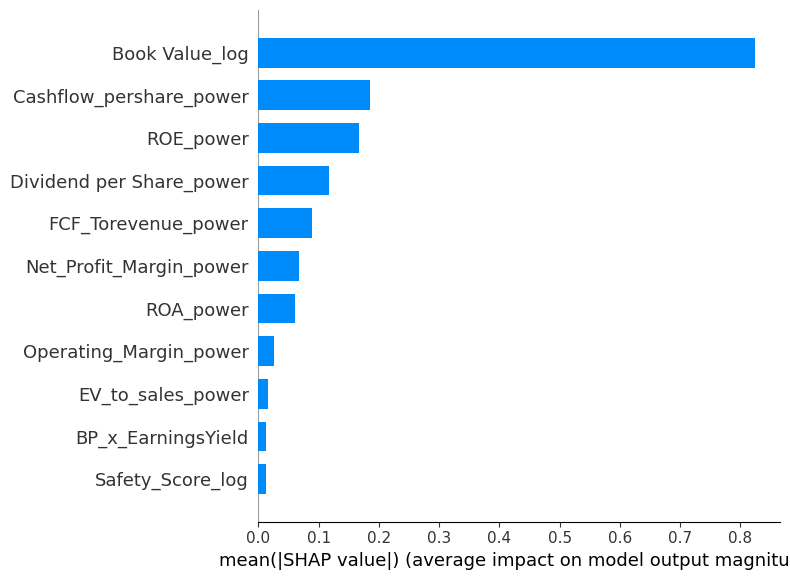

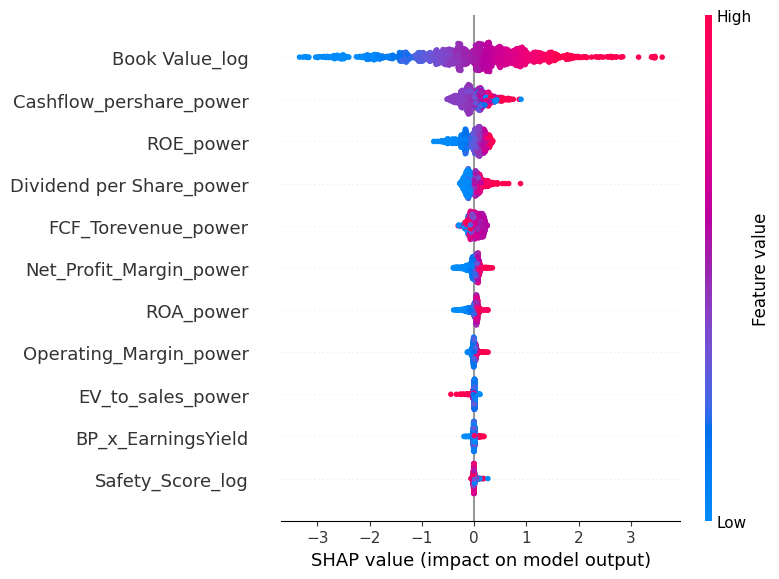

In [135]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(x)

# Summary bar plot
shap.summary_plot(shap_values, x, plot_type="bar", max_display=15)

# Beeswarm plot for detailed insight
shap.summary_plot(shap_values, x, plot_type="dot", max_display=15)


In [136]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xtest)

# Convert SHAP values into a DataFrame
shap_df = pd.DataFrame(shap_values, columns=xtest.columns)

# 1. Mean absolute SHAP value (feature importance in numbers)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)

print("Mean |SHAP| importance:")
print(shap_importance)

# 2. If you want feature contribution for each stock (row-wise)
stock_contributions = shap_df 

Mean |SHAP| importance:
Book Value_log              0.850030
Cashflow_pershare_power     0.192475
ROE_power                   0.165766
Dividend per Share_power    0.118488
FCF_Torevenue_power         0.090769
Net_Profit_Margin_power     0.066872
ROA_power                   0.062377
Operating_Margin_power      0.024401
EV_to_sales_power           0.014836
BP_x_EarningsYield          0.011442
Safety_Score_log            0.011352
dtype: float32


In [46]:
 shap_values= {
    "Book Value_log": 0.899931,
    "ROE_power": 0.180152,
    "Cashflow_pershare_power": 0.159239,
    "Dividend per Share_power": 0.085514,
    "FCF_Torevenue_power": 0.047209,
    "ROA_power": 0.046097,
    "Net_Profit_Margin_power": 0.040841,
    "FCF_Yield_power": 0.036023,
    "ROCE_power": 0.033735,
    "EV_to_sales_power": 0.022143,
    "EV_power": 0.018760,
    "BP_x_EarningsYield": 0.015291,
    "Asset_Turnover_log": 0.014908,
    "Operating_Margin_power": 0.013521,
    "Debt_to_Equity_log": 0.008703
}
df = pd.DataFrame(list(shap_values.items()), columns=["Feature", "Mean|SHAP|"])

# Calculate percentage contribution
df["% Contribution"] = df["Mean|SHAP|"] / df["Mean|SHAP|"].sum() * 100

# Sort by importance
df = df.sort_values(by="Mean|SHAP|", ascending=False).reset_index(drop=True)

# Display result
print(df)

                     Feature  Mean|SHAP|  % Contribution
0             Book Value_log    0.899931       55.480507
1                  ROE_power    0.180152       11.106323
2    Cashflow_pershare_power    0.159239        9.817042
3   Dividend per Share_power    0.085514        5.271915
4        FCF_Torevenue_power    0.047209        2.910422
5                  ROA_power    0.046097        2.841868
6    Net_Profit_Margin_power    0.040841        2.517837
7            FCF_Yield_power    0.036023        2.220808
8                 ROCE_power    0.033735        2.079754
9          EV_to_sales_power    0.022143        1.365110
10                  EV_power    0.018760        1.156549
11        BP_x_EarningsYield    0.015291        0.942686
12        Asset_Turnover_log    0.014908        0.919074
13    Operating_Margin_power    0.013521        0.833566
14        Debt_to_Equity_log    0.008703        0.536538


In [138]:
shap_values = {
    

    "Book Value_log": 0.850030,
    "Cashflow_pershare_power": 0.192475,
    "ROE_power": 0.165766,
    "Dividend per Share_power": 0.118488,
    "FCF_Torevenue_power": 0.090769,
    "Net_Profit_Margin_power": 0.066872,
    "ROA_power": 0.062377,
    "Operating_Margin_power": 0.024401,
    "EV_to_sales_power": 0.014836,
    "BP_x_EarningsYield": 0.011442,
    "Safety_Score_log": 0.011352
}





df = pd.DataFrame(list(shap_values.items()), columns=["Feature", "Mean|SHAP|"])

# Calculate percentage contribution
df["% Contribution"] = df["Mean|SHAP|"] / df["Mean|SHAP|"].sum() * 100

# Sort by importance
df = df.sort_values(by="Mean|SHAP|", ascending=False).reset_index(drop=True)

# Display result
print(df)


                     Feature  Mean|SHAP|  % Contribution
0             Book Value_log    0.850030       52.836013
1    Cashflow_pershare_power    0.192475       11.963827
2                  ROE_power    0.165766       10.303653
3   Dividend per Share_power    0.118488        7.364956
4        FCF_Torevenue_power    0.090769        5.642003
5    Net_Profit_Margin_power    0.066872        4.156618
6                  ROA_power    0.062377        3.877218
7     Operating_Margin_power    0.024401        1.516713
8          EV_to_sales_power    0.014836        0.922173
9         BP_x_EarningsYield    0.011442        0.711210
10          Safety_Score_log    0.011352        0.705616


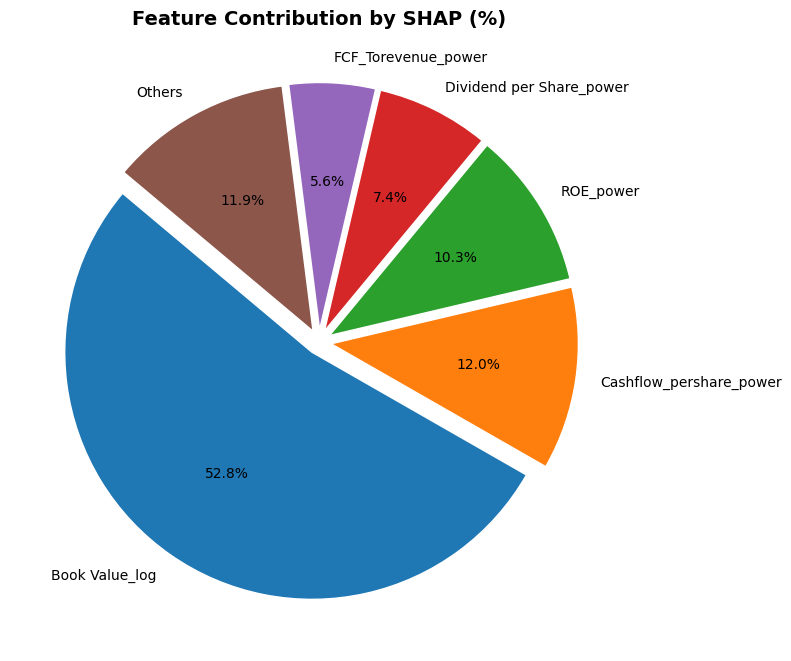

In [181]:

features = [
    "Book Value_log", "Cashflow_pershare_power", "ROE_power",
    "Dividend per Share_power", "FCF_Torevenue_power",
    "Net_Profit_Margin_power", "ROA_power", "Operating_Margin_power",
    "EV_to_sales_power", "BP_x_EarningsYield", "Safety_Score_log"
]

contributions = [
    52.836013, 11.963827, 10.303653, 7.364956, 5.642003,
    4.156618, 3.877218, 1.516713, 0.922173, 0.711210, 0.705616
]

# Sort by contribution
sorted_data = sorted(zip(contributions, features), reverse=True)
contributions_sorted, features_sorted = zip(*sorted_data)

# Keep top 5, group others
top_n = 5
top_contributions = list(contributions_sorted[:top_n])
top_features = list(features_sorted[:top_n])
others = sum(contributions_sorted[top_n:])
top_contributions.append(others)
top_features.append("Others")

# Plot Pie
plt.figure(figsize=(8,8))
plt.pie(
    top_contributions,
    labels=top_features,
    autopct="%.1f%%",
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    explode=[0.05]*len(top_contributions)  # explode all slices slightly
)

plt.title("Feature Contribution by SHAP (%)", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X=X[['Safety_Score_log',
        'Dividend per Share_power', 'ROE_power',
        'Operating_Margin_power', 'Net_Profit_Margin_power',
        'FCF_Torevenue_power', 'Cashflow_pershare_power',
       'EV_power', 'EV_to_sales_power', 'BP_x_EarningsYield','Book Value_log','ROA_power']]

# VIF DataFrame
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     feature        VIF
0           Safety_Score_log  13.227663
1   Dividend per Share_power   1.794145
2                  ROE_power   2.129835
3     Operating_Margin_power   1.280407
4    Net_Profit_Margin_power   2.583250
5        FCF_Torevenue_power   1.394221
6    Cashflow_pershare_power   1.055185
7                   EV_power   1.160332
8          EV_to_sales_power   1.936078
9         BP_x_EarningsYield   1.118674
10            Book Value_log   0.973979
11                 ROA_power   2.864204


In [83]:
corr=X.corr(numeric_only=True)

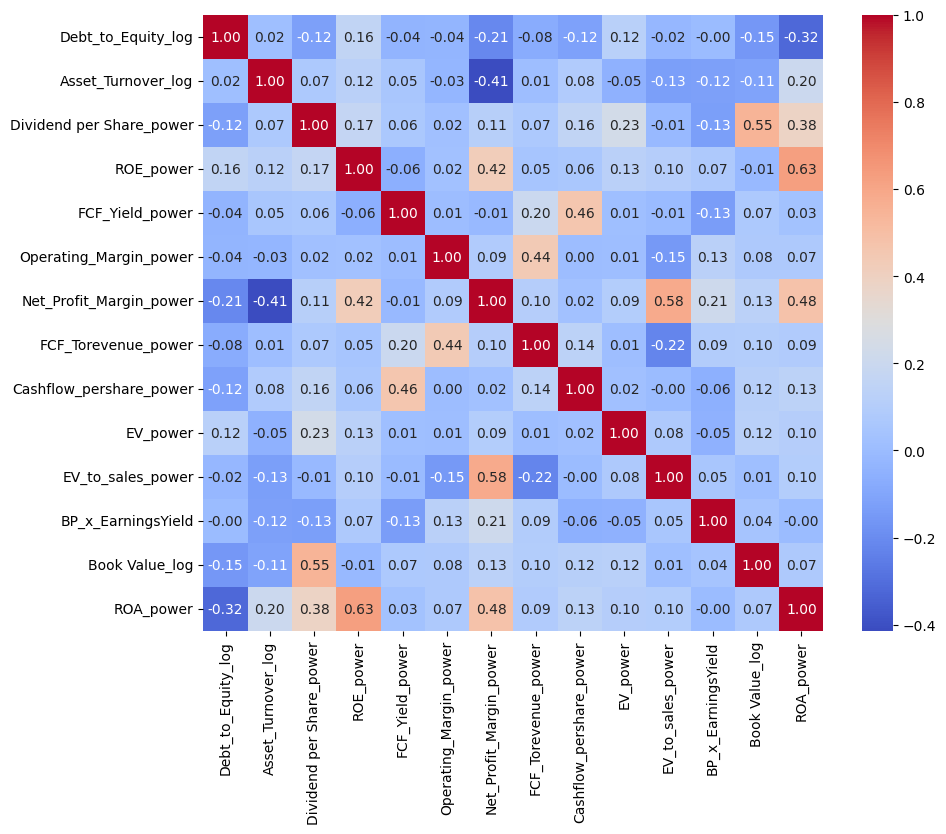

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [137]:
import statsmodels.api as sm

X_train_const = sm.add_constant(xtrain)  # add intercept
ols_model = sm.OLS(ytrain, X_train_const).fit()
print(ols_model.summary())


                             OLS Regression Results                            
Dep. Variable:     Intrinsic_value_log   R-squared:                       0.967
Model:                             OLS   Adj. R-squared:                  0.967
Method:                  Least Squares   F-statistic:                     3300.
Date:                 Thu, 28 Aug 2025   Prob (F-statistic):               0.00
Time:                         18:55:59   Log-Likelihood:                -105.11
No. Observations:                 1257   AIC:                             234.2
Df Residuals:                     1245   BIC:                             295.9
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

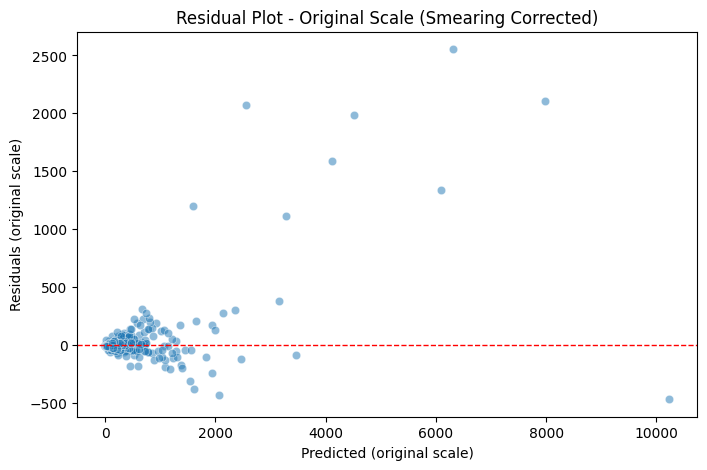

In [143]:
y_test_pred_log = xgb.predict(xtest)
y_test_pred_corrected = np.exp(y_test_pred_log) * smearing_factor

residuals_original = y_test_original - y_test_pred_corrected

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test_pred_corrected, y=residuals_original, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.xlabel("Predicted (original scale)")
plt.ylabel("Residuals (original scale)")
plt.title("Residual Plot - Original Scale (Smearing Corrected)")
plt.show()

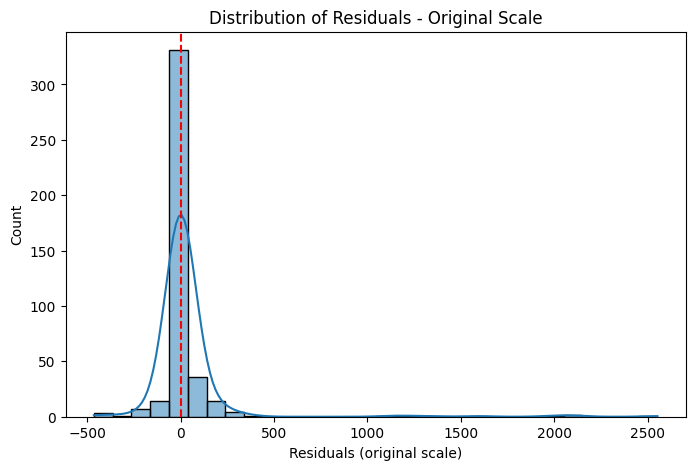

In [146]:
plt.figure(figsize=(8,5))
sns.histplot(residuals_original, bins=30, kde=True)
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residuals (original scale)")
plt.title("Distribution of Residuals - Original Scale")
plt.show()


In [147]:
RRMSE=261/1803

In [148]:
RRMSE

0.1447587354409318

In [151]:
from sklearn.model_selection import KFold, train_test_split

In [168]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)

rmse_scores = []
r2_scores = []
mape_scores = []

for train_index, test_index in kf.split(x):
    X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    xgb.fit(X_train_fold, y_train_fold)
    y_pred_fold = xgb.predict(X_test_fold)
    
    rmse_scores.append(np.sqrt(mean_squared_error(y_test_fold, y_pred_fold)))
    r2_scores.append(r2_score(y_test_fold, y_pred_fold))
    mape_scores.append(mean_absolute_percentage_error(y_test_fold, y_pred_fold)*100)

print("\nK-Fold CV RMSE scores:", rmse_scores)
print("Mean CV RMSE:", np.mean(rmse_scores))
print("K-Fold CV R² scores:", r2_scores)
print("Mean CV R²:", np.mean(r2_scores))
print("K-Fold CV MAPE scores:", mape_scores)
print("Mean CV MAPE:", np.mean(mape_scores))



K-Fold CV RMSE scores: [np.float64(0.18237023856923937), np.float64(0.22607503343709398), np.float64(0.17887002606092922), np.float64(0.18130725152616584), np.float64(0.26632942375855345), np.float64(0.1749412976443025), np.float64(0.16535272774531706), np.float64(0.18495912245400903), np.float64(0.23681542854076848)]
Mean CV RMSE: 0.19966894997070878
K-Fold CV R² scores: [0.9855213151701695, 0.9799160375949104, 0.9819335260926052, 0.9822354426659048, 0.9665648850519951, 0.9852310194789703, 0.986549583007867, 0.9847051193664714, 0.975642970787155]
Mean CV R²: 0.9809222110240055
K-Fold CV MAPE scores: [3.3204694190979933, 4.097126685781143, 3.261160845106168, 2.9528158293834927, 3.4504341343419154, 3.8268216827772235, 2.741629174381508, 3.58149212749578, 3.8780466399277236]
Mean CV MAPE: 3.4566662820325496


In [174]:
kf = KFold(n_splits=9, shuffle=True, random_state=42)

rmse_original = []
r2_original = []
mape_original = []

for train_index, test_index in kf.split(x):
    X_train_fold, X_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    
    # Fit model on log-transformed target
    xgb.fit(X_train_fold, y_train_fold)
    
    # Predict (on log scale)
    y_pred_fold = xgb.predict(X_test_fold)
    
    # Back-transform predictions and true values
    y_pred_original = np.exp(y_pred_fold)       # inverse of log
    y_test_original = np.exp(y_test_fold)       # inverse of log
    
    # Compute metrics on original scale
    rmse_original.append(np.sqrt(mean_squared_error(y_test_original, y_pred_original)))
    r2_original.append(r2_score(y_test_original, y_pred_original))
    mape_original.append(mean_absolute_percentage_error(y_test_original, y_pred_original))

print("CV RMSE on original scale:", rmse_original)
print("Mean CV RMSE:", np.mean(rmse_original))
print("CV R² on original scale:", r2_original)
print("Mean CV R²:", np.mean(r2_original))
print("CV MAPE on original scale:", mape_original)
print("Mean CV MAPE:", np.mean(mape_original))

CV RMSE on original scale: [np.float64(308.6269010803144), np.float64(230.57604338290835), np.float64(74.35006687942598), np.float64(311.88303534218466), np.float64(4109.400645768768), np.float64(372.47070147245665), np.float64(370.78522974980336), np.float64(137.50158200588976), np.float64(630.9590704384951)]
Mean CV RMSE: 727.3948084578052
CV R² on original scale: [0.927835575432952, 0.9584813509125572, 0.962185288788414, 0.8044020665945226, 0.2427705133067366, 0.8783226668746404, 0.8251491134533432, 0.9174948734566217, 0.7279185116610434]
Mean CV R²: 0.8049511067200924
CV MAPE on original scale: [0.12902201224804533, 0.15488951783090374, 0.12266586127660613, 0.12468646650794207, 0.1415018329490878, 0.11646146969604391, 0.10842272230876082, 0.12494674688241827, 0.16356798395530064]
Mean CV MAPE: 0.13179606818390097


In [185]:
import shap
import pandas as pd

# --- Compute SHAP values ---
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(xtest)

# Convert SHAP values into a DataFrame
shap_df = pd.DataFrame(shap_values, columns=xtest.columns)

# 1️⃣ Mean absolute SHAP value (optional, same as before)
shap_importance = shap_df.abs().mean().sort_values(ascending=False)
print("Mean |SHAP| importance:")
print(shap_importance)

# 2️⃣ Global SHAP % contribution
total_shap = shap_df.abs().sum().sum()  # total magnitude of all SHAP values
global_shap_percent = (shap_df.abs().sum() / total_shap) * 100
global_shap_percent = global_shap_percent.sort_values(ascending=False)

print("\nGlobal SHAP % contribution:")
print(global_shap_percent)

# 3️⃣ Row-wise contributions for each stock (optional)
stock_contributions = shap_df


Mean |SHAP| importance:
Book Value_log              0.857249
Cashflow_pershare_power     0.202119
ROE_power                   0.160158
Dividend per Share_power    0.114534
FCF_Torevenue_power         0.102065
ROA_power                   0.065240
Net_Profit_Margin_power     0.058727
Operating_Margin_power      0.031681
EV_to_sales_power           0.013600
BP_x_EarningsYield          0.011814
Safety_Score_log            0.008673
dtype: float32

Global SHAP % contribution:
Book Value_log              52.725918
Cashflow_pershare_power     12.431496
ROE_power                    9.850677
Dividend per Share_power     7.044496
FCF_Torevenue_power          6.277599
ROA_power                    4.012618
Net_Profit_Margin_power      3.612057
Operating_Margin_power       1.948545
EV_to_sales_power            0.836475
BP_x_EarningsYield           0.726655
Safety_Score_log             0.533469
dtype: float32


In [57]:
import pandas as pd
import numpy as np
import pickle
import warnings
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

warnings.filterwarnings("ignore")
class RowFilter(BaseEstimator, TransformerMixin):
    """Drops rows with invalid EPS or Book Value and removes NaN/inf."""
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        df = df[df['EPS'] > 0]
        df = df[df['Book Value'] > 0]
        df = df.replace([np.inf, -np.inf], np.nan).dropna()
        return df
# --- Define Custom Transformer Classes ---
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        df = X.copy()
        # Feature engineering
        df['PE'] = df['Price'] / df['EPS']
        df['Earnings_Yield'] = 1 / df['PE']
        df['PB'] = df['Price'] / df['Book Value']
        df['BP'] = 1 / df['PB']
        df['ROE'] = df['Net Income'] / df['Shareholder Equity']
        df['Operating_Margin'] = df['Operating Income'] / df['Revenue']
        df['Net_Profit_Margin'] = df['Net Income'] / df['Revenue']
        df['ROA'] = df['Net Income'] / df['Total Assets']
        df['Debt_to_Equity'] = df['Total Liabilities'] / df['Shareholder Equity']
        df['Safety_Score'] = 1 / (1 + df['Debt_to_Equity'])
        df['Shares_Outstanding'] = df['Net Income'] / df['EPS']
        df['Market_Cap'] = df['Price'] * df['Shares_Outstanding']
        df['EV'] = df['Market_Cap'] + df['Total Liabilities']
        df['EV_to_sales'] = df['EV'] / df['Revenue']
        df['FCF_Torevenue'] = df['Free Cash Flow'] / df['Revenue']
        df['Cashflow_pershare'] = df['Free Cash Flow'] / df['Shares_Outstanding']
        df['BP_x_EarningsYield'] = df['BP'] * df['Earnings_Yield']
        return df

class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        self.power_transformer = None
        self.logt = []
        self.power = []
        
    def fit(self, X, y=None):
        df_transformed = X.copy()
        df_transformed = df_transformed.replace([np.inf, -np.inf], np.nan).dropna()

        # Log transform if all values > 0, otherwise power transform
        self.logt = [col for col in df_transformed.columns if (df_transformed[col] > 0).all()]
        self.power = [col for col in df_transformed.columns if col not in self.logt]
        
        self.power_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
        if self.power:
            self.power_transformer.fit(df_transformed[self.power])
            
        return self

    def transform(self, X):
        df_transformed = X.copy()
        df_transformed = df_transformed.replace([np.inf, -np.inf], np.nan)

        # Apply log transform
        for col in self.logt:
            df_transformed[col + '_log'] = np.log1p(df_transformed[col])
        
        # Apply power transform
        if self.power:
            transformed_power = self.power_transformer.transform(df_transformed[self.power])
            for i, c in enumerate(self.power):
                df_transformed[c + '_power'] = transformed_power[:, i]

        return df_transformed[self.selected_features]

# --- Main Execution Block ---
if __name__ == '__main__':
    # Load raw data
    df = pd.read_csv('Marketdata_newdata.csv')

    # Create targets
    df['Intrinsic_value'] = np.sqrt(22.5 * df['EPS'] * df['Book Value'])
    df['Intrinsic_value_log'] = np.log1p(df['Intrinsic_value'])

    # Initial features
    initial_features = ['EPS', 'Book Value', 'Price', 'Net Income', 'Shareholder Equity',
                        'Operating Income', 'Revenue', 'Total Assets', 'Total Liabilities',
                        'Free Cash Flow', 'Dividend per Share']

    # Combine features and targets for cleaning
    df_combined = df[initial_features + ['Intrinsic_value', 'Intrinsic_value_log']].copy()

    # Remove invalid rows
    df_combined.drop(df_combined[df_combined['EPS'] <= 0].index, inplace=True)
    df_combined.drop(df_combined[df_combined['Book Value'] <= 0].index, inplace=True)
    df_combined = df_combined.replace([np.inf, -np.inf], np.nan).dropna()

    # Split into X and y
    X = df_combined[initial_features]
    y_log = df_combined['Intrinsic_value_log']  # for training
    y = df_combined['Intrinsic_value']          # for evaluation/back-transform

    # Features for pipeline after transformation
    selected_features = [
        'Dividend per Share_power', 'ROE_power', 'Operating_Margin_power', 'Net_Profit_Margin_power',
        'FCF_Torevenue_power', 'Cashflow_pershare_power', 'EV_to_sales_power', 'BP_x_EarningsYield_log',
        'Book Value_log', 'ROA_power', 'Debt_to_Equity_log'
    ]

    # Pipeline
    full_pipeline = Pipeline([
        ('row_filter', RowFilter()),
        ('feature_engineer', FeatureEngineer()),
        ('preprocessor', Preprocessor(selected_features)),
        ('model', XGBRegressor(
            n_estimators=500, learning_rate=0.05, max_depth=5,
            subsample=0.8, colsample_bytree=0.8, random_state=42
        ))
    ])

    # Train
    full_pipeline.fit(X, y_log)

    # Compute smearing factor
    y_pred_log = full_pipeline.predict(X)
    residuals = y_log - y_pred_log
    smearing_factor = float(np.mean(np.exp(residuals)))

    # Back-transform to original scale
    y_pred_original = np.expm1(y_pred_log) * smearing_factor

    # Evaluate
    r2 = r2_score(y, y_pred_original)
    rmse = np.sqrt(mean_squared_error(y, y_pred_original))
    mape = mean_absolute_percentage_error(y, y_pred_original) * 100

    # Save pipeline
    with open('final_model_pipeline_deploying.pkl', 'wb') as f:
        pickle.dump(full_pipeline, f)

    # Results
    print("Pipeline evaluation on original scale:")
    print(f"R2: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"Smearing factor: {smearing_factor:.4f}")
    print("The full pipeline has been trained, evaluated, and saved successfully.")


Pipeline evaluation on original scale:
R2: 0.9971
RMSE: 96.5529
MAPE: 2.46%
Smearing factor: 1.0005
The full pipeline has been trained, evaluated, and saved successfully.


In [58]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train_log, y_test_log, y_train, y_test = train_test_split(
    X, y_log, y, test_size=0.25, random_state=42
)

# Train pipeline on log1p target
full_pipeline.fit(X_train, y_train_log)

# Compute smearing factor on training set
y_train_pred_log = full_pipeline.predict(X_train)
residuals = y_train_log - y_train_pred_log
smearing_factor = float(np.mean(np.exp(residuals)))

# Predict on test set and back-transform
y_test_pred_log = full_pipeline.predict(X_test)
y_test_pred_original = np.expm1(y_test_pred_log) * smearing_factor

# Evaluate on original scale
r2 = r2_score(y_test, y_test_pred_original)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_original))
mape = mean_absolute_percentage_error(y_test, y_test_pred_original) * 100

print("Pipeline evaluation on original scale (test set):")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.2f}%")
print(f"Smearing factor: {smearing_factor:.4f}")


Pipeline evaluation on original scale (test set):
R2: 0.9578
RMSE: 223.3455
MAPE: 15.82%
Smearing factor: 1.0002


In [59]:
X_fe = FeatureEngineer().fit_transform(X)
X_pre = full_pipeline.named_steps['preprocessor'].transform(X_fe)

print("Final features shape:", X_pre.shape)
print("Final features columns:", X_pre.columns.tolist())


Final features shape: (1676, 11)
Final features columns: ['Dividend per Share_power', 'ROE_power', 'Operating_Margin_power', 'Net_Profit_Margin_power', 'FCF_Torevenue_power', 'Cashflow_pershare_power', 'EV_to_sales_power', 'BP_x_EarningsYield_log', 'Book Value_log', 'ROA_power', 'Debt_to_Equity_log']


 99%|===================| 1654/1676 [00:49<00:00]        

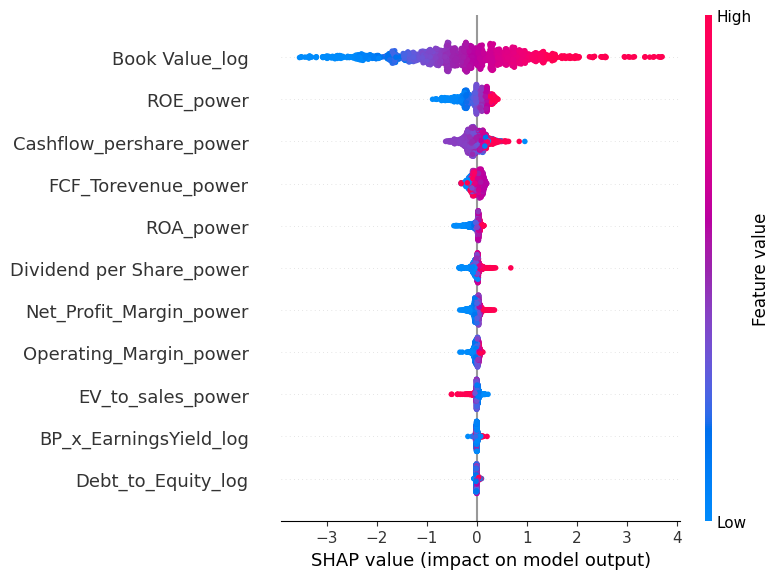

In [10]:
import shap

explainer = shap.Explainer(full_pipeline.named_steps['model'], X_pre)
shap_values = explainer(X_pre)

shap.summary_plot(shap_values, X_pre)


In [23]:
print(shap_values)
print(shap_values.keys())
print(shap_values.values())

{'Book Value_log': 798.941889, 'Cashflow_pershare_power': 109.904235, 'ROE_power': 75.998899, 'Dividend per Share_power': 66.731923, 'FCF_Torevenue_power': 30.882616, 'ROA_power': 21.441169, 'Net_Profit_Margin_power': 20.534858, 'Operating_Margin_power': 11.852412, 'EV_to_sales_power': 8.679376, 'BP_x_EarningsYield_log': 5.891439, 'Debt_to_Equity_log': 4.966897}
dict_keys(['Book Value_log', 'Cashflow_pershare_power', 'ROE_power', 'Dividend per Share_power', 'FCF_Torevenue_power', 'ROA_power', 'Net_Profit_Margin_power', 'Operating_Margin_power', 'EV_to_sales_power', 'BP_x_EarningsYield_log', 'Debt_to_Equity_log'])
dict_values([798.941889, 109.904235, 75.998899, 66.731923, 30.882616, 21.441169, 20.534858, 11.852412, 8.679376, 5.891439, 4.966897])


In [26]:
#7) SHAP
# -------------------------
X_pre = full_pipeline.named_steps['preprocessor'].transform(
    full_pipeline.named_steps['feature_engineer'].transform(X)
)

explainer = shap.Explainer(full_pipeline.named_steps['model'], X_pre)
shap_values = explainer(X_pre)
shap_df = pd.DataFrame(shap_values.values, columns=selected_features)

shap_importance = shap_df.abs().mean().sort_values(ascending=False)
print("Mean |SHAP| importance:")
print(shap_importance)


 99%|===================| 1652/1676 [00:46<00:00]        

Mean |SHAP| importance:
Book Value_log              0.903991
ROE_power                   0.194748
Cashflow_pershare_power     0.144939
FCF_Torevenue_power         0.066704
ROA_power                   0.056879
Dividend per Share_power    0.055237
Net_Profit_Margin_power     0.044994
Operating_Margin_power      0.025822
EV_to_sales_power           0.022006
Debt_to_Equity_log          0.012194
BP_x_EarningsYield_log      0.010501
dtype: float64


In [60]:
X_fe = FeatureEngineer().fit_transform(X)
X_pre = full_pipeline.named_steps['preprocessor'].transform(X_fe)

print("Final features shape:", X_pre.shape)
print("Final features columns:", X_pre.columns.tolist())


Final features shape: (1676, 11)
Final features columns: ['Dividend per Share_power', 'ROE_power', 'Operating_Margin_power', 'Net_Profit_Margin_power', 'FCF_Torevenue_power', 'Cashflow_pershare_power', 'EV_to_sales_power', 'BP_x_EarningsYield_log', 'Book Value_log', 'ROA_power', 'Debt_to_Equity_log']


In [33]:
import numpy as np
import pandas as pd

class DeployedPredictor:
    def __init__(self, pipeline, smearing_factor):
        """
        pipeline: trained pipeline (FeatureEngineer + Preprocessor + XGBRegressor)
        smearing_factor: computed from training residuals
        """
        self.pipeline = pipeline
        self.smearing_factor = smearing_factor
        
    def predict(self, X_new):
        """
        Predict intrinsic value on new raw data.
        X_new: DataFrame with raw features (Price, EPS, Book Value, etc.)
        Returns: predictions on original scale
        """
        # Pipeline outputs predictions on log scale
        y_log_pred = self.pipeline.predict(X_new)
        # Back-transform to original scale with smearing factor
        y_original_pred = np.expm1(y_log_pred) * self.smearing_factor
        return y_original_pred
    
    def explain(self, X_new):
        """
        Compute SHAP values for new data.
        Returns: shap_values object and preprocessed features used by the model
        """
        # Preprocess raw data exactly as pipeline does
        X_preprocessed = self.pipeline.named_steps['preprocessor'].transform(
            self.pipeline.named_steps['feature_engineer'].transform(X_new)
        )
        import shap
        explainer = shap.Explainer(self.pipeline.named_steps['model'], X_preprocessed)
        shap_values = explainer(X_preprocessed)
        return shap_values, X_preprocessed


[ 219.78064   117.448135  323.7559   ...  570.6068    544.4256
 1019.6053  ]


100%|===================| 2011/2015 [01:02<00:00]        

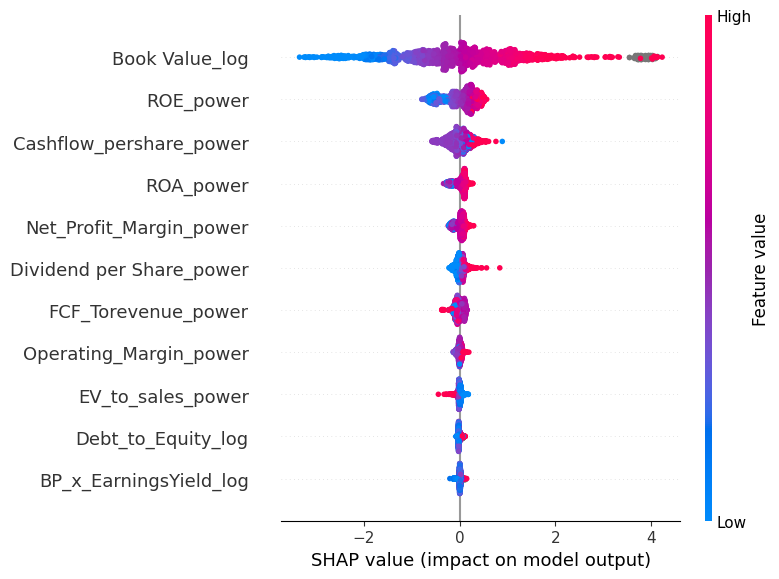

In [35]:
# Suppose you have new raw data
X_new = pd.read_csv("Marketdata_newdata.csv")

# Initialize predictor with trained pipeline and smearing factor
deployed_model = DeployedPredictor(full_pipeline, smearing_factor)

# Predict
predictions = deployed_model.predict(X_new)
print(predictions)

# Optional: Get SHAP explanations
shap_values, X_preprocessed = deployed_model.explain(X_new)

# Plot SHAP summary
import shap
shap.summary_plot(shap_values, X_preprocessed)


In [36]:
# X_new: raw input DataFrame
predictions = deployed_model.predict(X_new)
shap_values, X_preprocessed = deployed_model.explain(X_new)


 99%|===================| 1989/2015 [01:02<00:00]        

In [37]:
import pandas as pd
import numpy as np

# SHAP values as DataFrame (rows = samples, columns = features)
shap_df = pd.DataFrame(shap_values.values, columns=X_preprocessed.columns)

# Global % contribution per feature (optional)
shap_percent = (shap_df.abs().mean() / shap_df.abs().mean().sum()) * 100
shap_percent = shap_percent.sort_values(ascending=False)
print("Global SHAP % contribution:\n", shap_percent)


Global SHAP % contribution:
 Book Value_log              55.105352
ROE_power                   14.228890
Cashflow_pershare_power      8.708918
ROA_power                    5.389759
Net_Profit_Margin_power      4.051250
Dividend per Share_power     3.771037
FCF_Torevenue_power          3.442987
Operating_Margin_power       1.619613
EV_to_sales_power            1.496705
Debt_to_Equity_log           1.194075
BP_x_EarningsYield_log       0.991413
dtype: float64


In [38]:
# X_new should have a Ticker column
X_new.head()
# Example:
#   Ticker   Price   EPS   Book Value  ...
# 0  ABC     240    12    180
# 1  XYZ     120     8     90


,Ticker,Price,EPS,Book Value,Dividend per Share,Net Income,Shareholder Equity,Current Liabilities,EBIT,Total Assets,Total Liabilities,Revenue,Operating Income,Free Cash Flow
0,20MICRONS.NS,240.800003,17.40,121.679,1.25,6.237630e+08,4.293638e+09,2.193068e+09,9.402180e+08,7.145086e+09,2.804542e+09,9.116589e+09,1.006005e+09,-4.489380e+08
1,21STCENMGM.NS,56.950001,-9.33,48.584,2.50,1.233770e+08,5.101340e+08,5.858100e+07,1.951270e+08,5.706500e+08,6.051600e+07,1.128817e+09,1.944280e+08,5.147800e+07
2,360ONE.NS,1078.900024,26.56,180.591,12.00,1.015300e+10,7.065120e+10,6.828100e+09,2.233840e+10,1.976870e+11,1.270358e+11,2.635310e+10,1.283430e+10,-2.466110e+10
3,3IINFOLTD.NS,22.360001,2.45,18.139,0.00,2.535000e+08,3.068800e+09,2.219800e+09,1.920000e+08,5.728200e+09,2.659300e+09,7.257600e+09,-6.840000e+07,3.974000e+08
4,3MINDIA.NS,31160.000000,440.87,1639.135,160.00,4.760674e+09,1.846497e+10,1.042956e+10,7.842089e+09,3.014592e+10,1.168095e+10,4.442860e+10,7.262615e+09,2.996842e+09


In [48]:
import os
os.path.getsize('final_model_pipeline_deploying.pkl')


1208697

In [63]:
import pickle

with open('final_model_pipeline_deploying.pkl', 'wb') as f:
    pickle.dump(full_pipeline, f)  # Make sure 'full_pipeline' exists in memory


In [64]:
import dill

# Save the pipeline
with open('final_model_pipeline_deploying.dill', 'wb') as f:
    dill.dump(full_pipeline, f)

print("Pipeline saved successfully with dill!")


Pipeline saved successfully with dill!


In [65]:
import dill

# Load the pipeline
with open('final_model_pipeline_deploying.dill', 'rb') as f:
    deployed_model = dill.load(f)

print("Pipeline loaded successfully with dill!")


Pipeline loaded successfully with dill!


In [54]:
import pandas as pd
df_new = pd.read_csv('Marketdata_newdata.csv')
print(df_new.columns)


Index(['Ticker', 'Price', 'EPS', 'Book Value', 'Dividend per Share',
       'Net Income', 'Shareholder Equity', 'Current Liabilities', 'EBIT',
       'Total Assets', 'Total Liabilities', 'Revenue', 'Operating Income',
       'Free Cash Flow'],
      dtype='object')


In [68]:
df_new = pd.read_csv('Marketdata_newdata.csv')

# Keep Price for feature engineering
X_deploy = df_new.copy()  # do NOT drop Price

# --- Predict using the deployed pipeline ---
# The pipeline already contains RowFilter, so invalid rows are dropped automatically
y_pred_log = deployed_model.predict(X_deploy)

# --- Get the filtered rows after RowFilter (same rows as predictions) ---
df_filtered = deployed_model.named_steps['row_filter'].transform(X_deploy)

# --- Compute smearing factor ---
# Use the smearing factor from training, or 1 if not saved
smearing_factor = 1.0

# --- Back-transform predictions to original scale ---
y_pred_original = np.expm1(y_pred_log) * smearing_factor

# --- Create results dataframe with only valid rows ---
results_df = pd.DataFrame({
    'Ticker': df_filtered['Ticker'],
    'Price': df_filtered['Price'],
    'Predicted_Intrinsic_Value': y_pred_original
})

# --- Compute SHAP values ---
# Use only the model step for SHAP on preprocessed features
X_preprocessed = deployed_model.named_steps['preprocessor'].transform(
    deployed_model.named_steps['feature_engineer'].transform(df_filtered)
)

explainer = shap.Explainer(deployed_model.named_steps['model'], X_preprocessed)
shap_values = explainer(X_preprocessed)

shap_df = pd.DataFrame(shap_values.values, columns=X_preprocessed.columns)

# Add SHAP values to results
results_df = pd.concat([results_df, shap_df.add_prefix('SHAP_')], axis=1)

# --- Save results ---
results_df.to_csv('Deployment_Results3.csv', index=False)
print(f"Deployment predictions + SHAP saved successfully! Total rows: {len(results_df)}")


100%|===================| 1674/1676 [00:50<00:00]        

Deployment predictions + SHAP saved successfully! Total rows: 1951


In [ ]:
Intrinsic Value Prediction Project
│
├── data/
│   └── Marketdata_newdata.csv
├── model/
│   └── final_model_pipeline_deploying.dill
├── api/
│   └── predict_api.py  # Flask/FastAPI
├── deployment/
│   └── AWS_SageMaker_script.py
└── notebooks/
    └── EDA + SHAP analysis.ipynb
